In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import ttest_ind
import scipy.stats as stats

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-churn/E Commerce Dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/e-commerce-churn/E Commerce Dataset.csv")

# Know Your Data

In [3]:
df.head()

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
#deleting first column
df.pop(df.columns[0])

0            0
1            1
2            2
3            3
4            4
         ...  
16885    16885
16886    16886
16887    16887
16888    16888
16889    16889
Name: Unnamed: 0, Length: 16890, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16890 entries, 0 to 16889
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   16890 non-null  int64  
 1   Churn                        16890 non-null  int64  
 2   Tenure                       16107 non-null  float64
 3   PreferredLoginDevice         16890 non-null  object 
 4   CityTier                     16890 non-null  int64  
 5   WarehouseToHome              15555 non-null  float64
 6   PreferredPaymentMode         16290 non-null  object 
 7   Gender                       16890 non-null  object 
 8   HourSpendOnApp               16125 non-null  float64
 9   NumberOfDeviceRegistered     16290 non-null  float64
 10  PreferedOrderCat             16890 non-null  object 
 11  SatisfactionScore            16890 non-null  int64  
 12  MaritalStatus                16290 non-null  object 
 13  NumberOfAddress 

In [6]:
df.isnull().sum()

CustomerID                        0
Churn                             0
Tenure                          783
PreferredLoginDevice              0
CityTier                          0
WarehouseToHome                1335
PreferredPaymentMode            600
Gender                            0
HourSpendOnApp                  765
NumberOfDeviceRegistered        600
PreferedOrderCat                  0
SatisfactionScore                 0
MaritalStatus                   600
NumberOfAddress                   0
Complain                          0
OrderAmountHikeFromlastYear     795
CouponUsed                      768
OrderCount                      774
DaySinceLastOrder               921
CashbackAmount                    0
dtype: int64

In [7]:
#percentage of missing data per column
round(df.isnull().sum()/df.shape[0], 2)*100
#nothing too large so we will handle them

CustomerID                     0.0
Churn                          0.0
Tenure                         5.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                8.0
PreferredPaymentMode           4.0
Gender                         0.0
HourSpendOnApp                 5.0
NumberOfDeviceRegistered       4.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  4.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    5.0
CouponUsed                     5.0
OrderCount                     5.0
DaySinceLastOrder              5.0
CashbackAmount                 0.0
dtype: float64

In [8]:
#transposing the describe for easier reading
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,16890.0,52815.500000,1625.289097,50001.0,51408.00,52815.50,54223.0,55630.00
Churn,16890.0,0.168384,0.374218,0.0,0.00,0.00,0.0,1.00
Tenure,16107.0,-176.226485,1353.431459,-10000.0,2.00,9.00,16.0,61.00
CityTier,16890.0,1.654707,0.915335,1.0,1.00,1.00,3.0,3.00
WarehouseToHome,15555.0,15.671553,8.556625,5.0,9.00,14.00,21.0,127.00
HourSpendOnApp,16125.0,2.931535,0.721881,0.0,2.00,3.00,3.0,5.00
NumberOfDeviceRegistered,16290.0,3.686740,1.024065,1.0,3.00,4.00,4.0,6.00
SatisfactionScore,16890.0,10470.403552,77841.558859,1.0,2.00,3.00,4.0,589314.00
NumberOfAddress,16890.0,4.214032,2.583433,1.0,2.00,3.00,6.0,22.00
Complain,16890.0,0.284902,0.451381,0.0,0.00,0.00,1.0,1.00


In [9]:
df.duplicated().sum()

11260

In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

0

# Correlation

<AxesSubplot:>

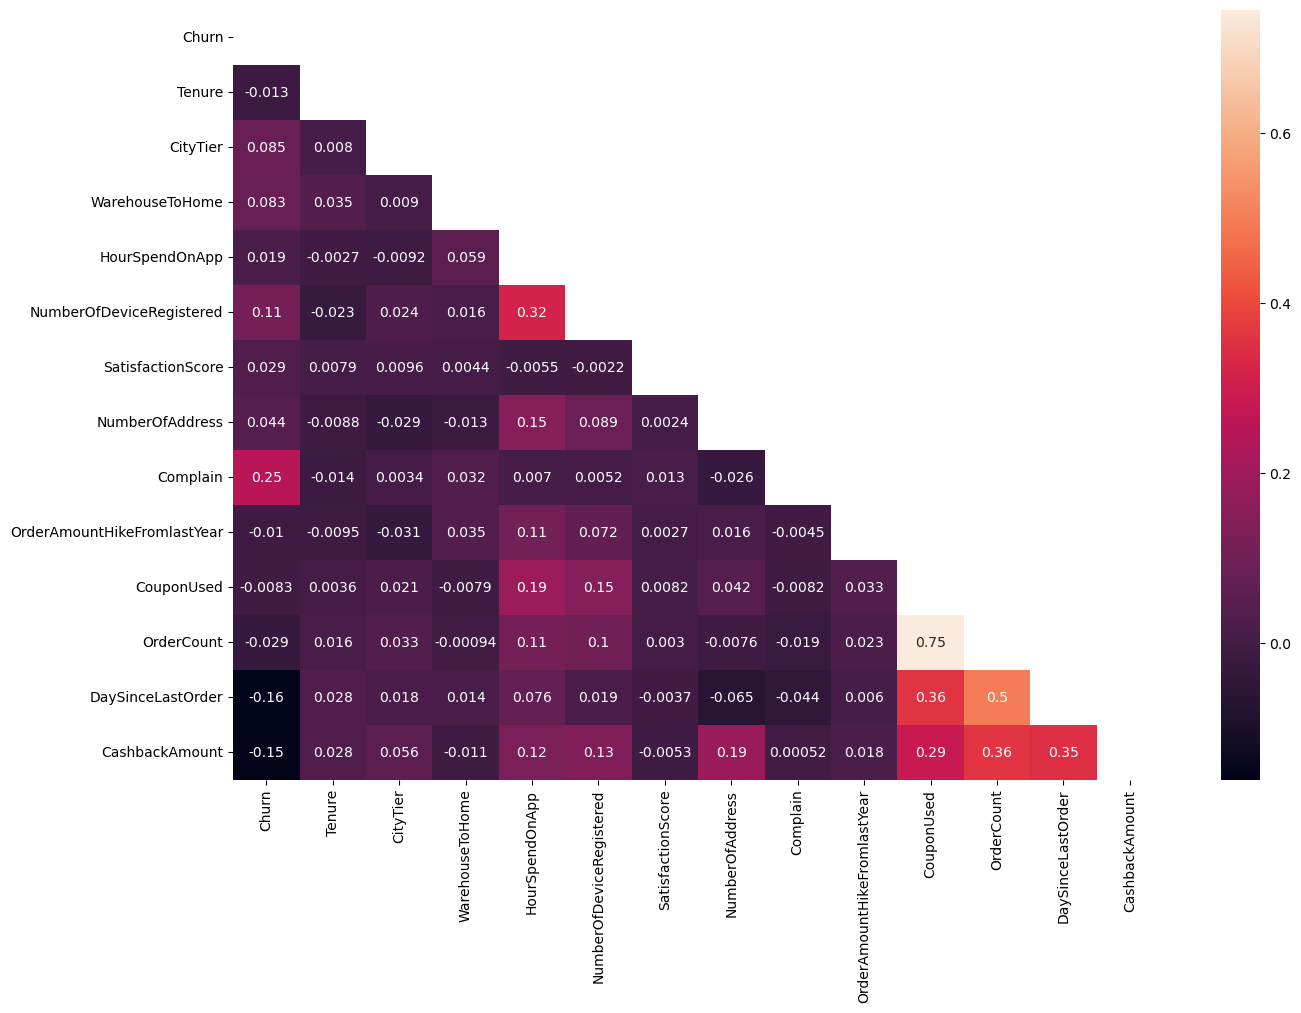

In [11]:
plt.figure(figsize=(15, 10))
df2 = df.drop('CustomerID', axis=1)
#masking upper half triangle
mask = np.triu(df2.corr())
sns.heatmap(df2.corr(), annot=True, mask=mask)

# Checking for Outliers

## Numeric columns

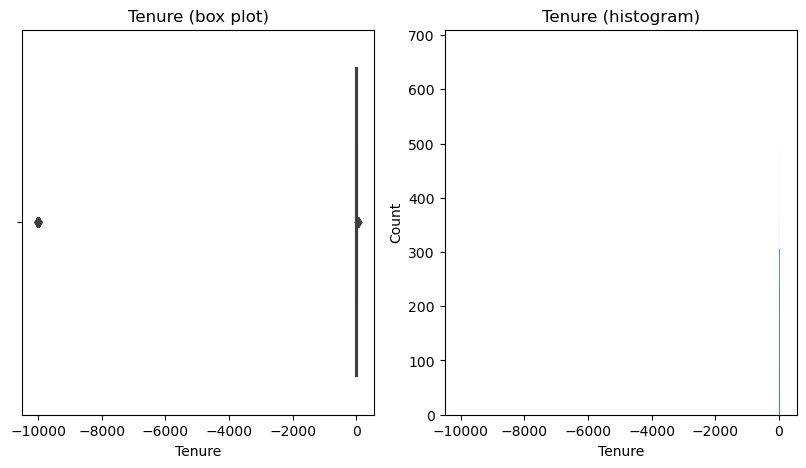

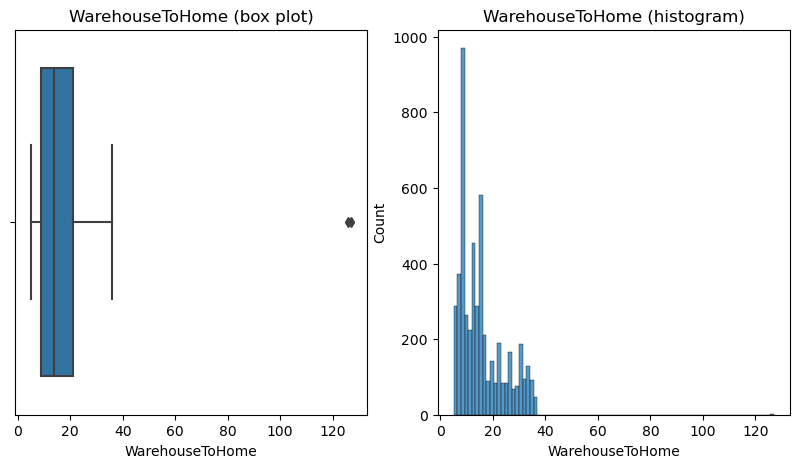

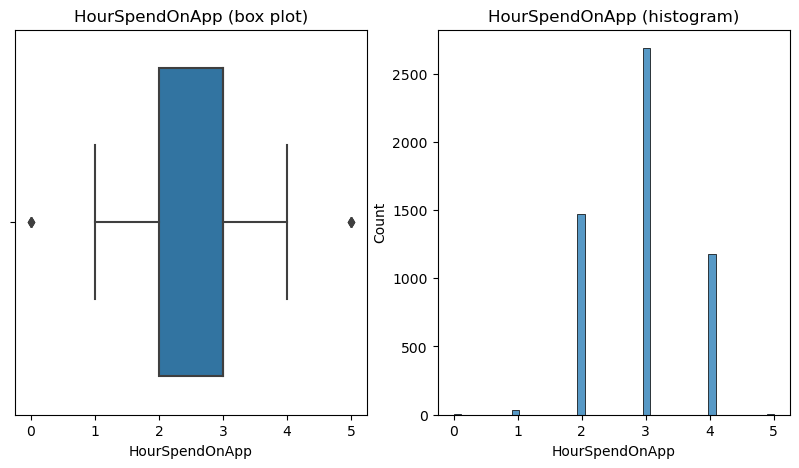

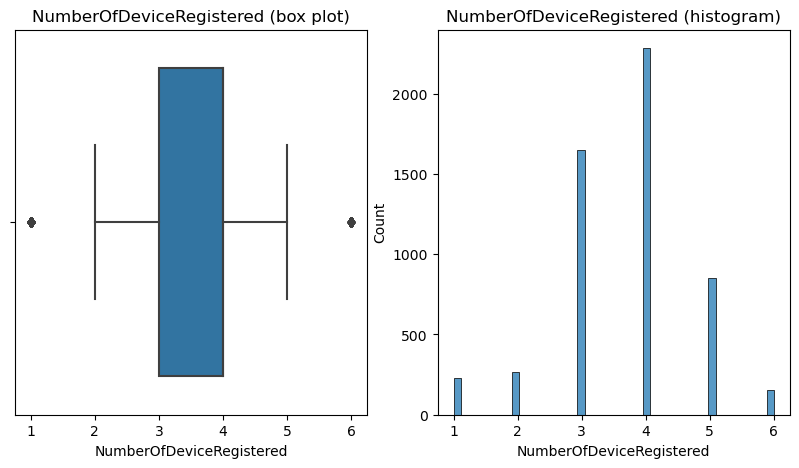

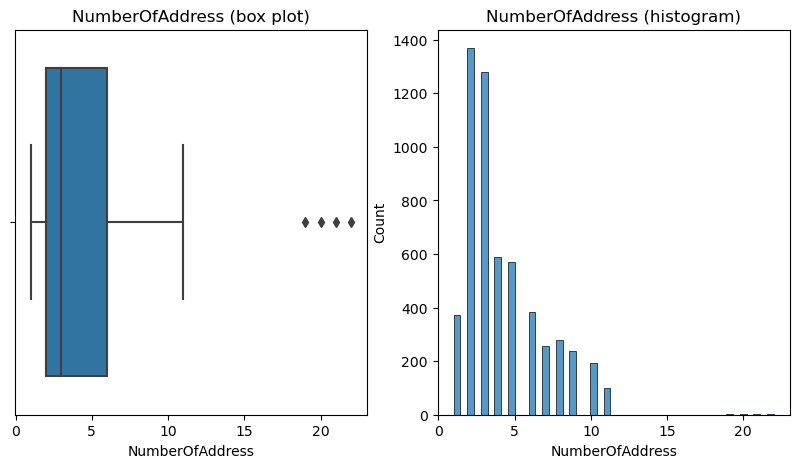

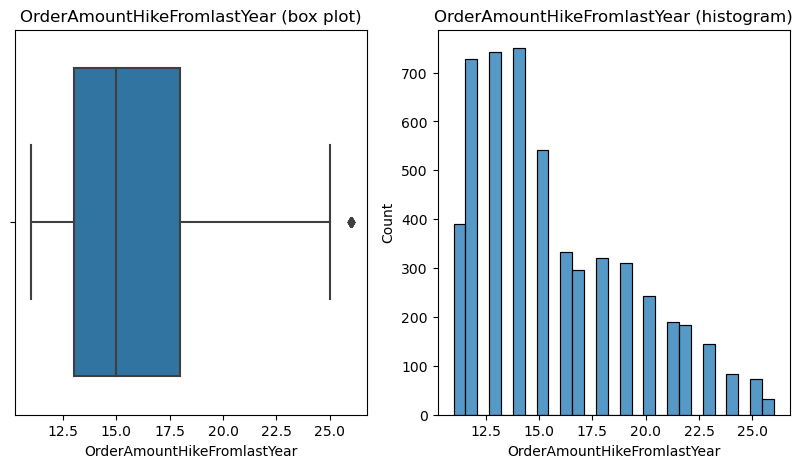

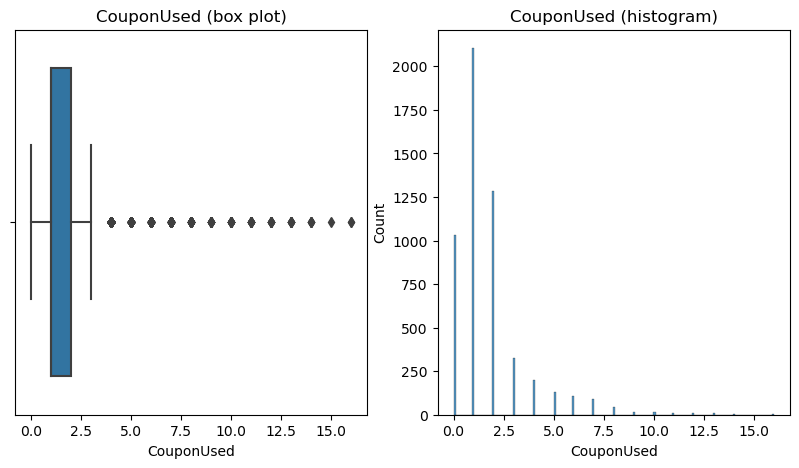

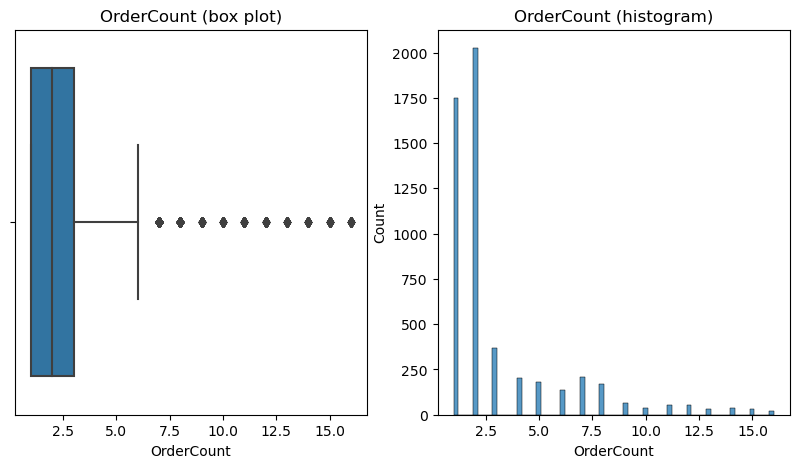

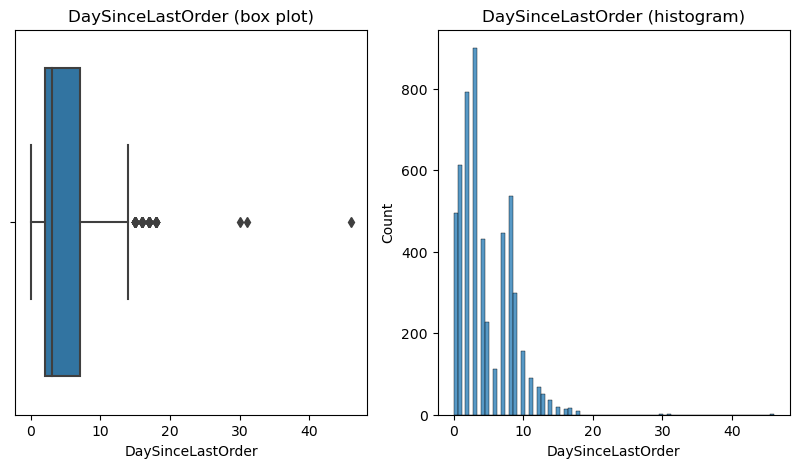

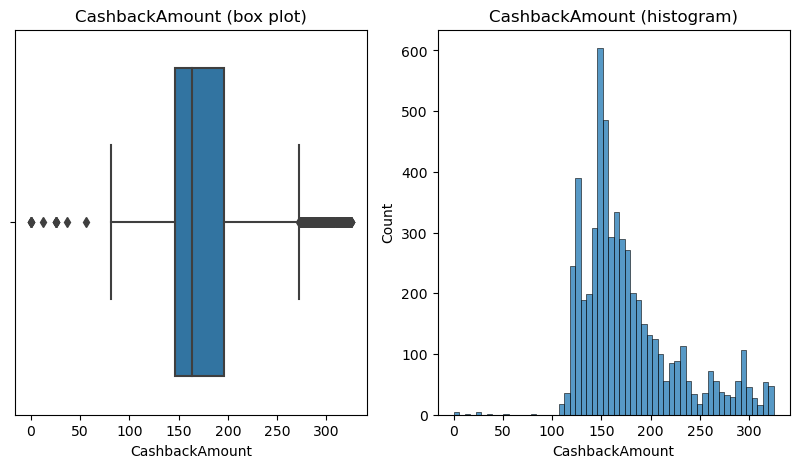

In [12]:
exclude_cols = ['CustomerID', 'Churn','Complain', 'CityTier','SatisfactionScore']

for i in df.columns:
 if (df[i].dtype != 'object') & (i not in exclude_cols):
    fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
    
    sns.boxplot(x=df[i], ax=axs[0])
    axs[0].set_title(i + ' (box plot)')
    
    sns.histplot(x=df[i], kde=False, ax=axs[1])
    axs[1].set_title(i + ' (histogram)')
    
    plt.show()

# Numerical variables validation:

All outliers/distributions are logical but:

Tenure : have 100 values less than 0, there's also outliers (50,51,60,61).

WarehouseToHome: have two outliers (126,127) but it could be normal because maybe the customer lives far from the warehouse.

NumberOfAddress:have four outliers (19,20,21,22) it's not very logical for a customer to have alot of address but it could be normal as customer chooses to deliver the order in a specific address.


## Categorical Columns

In [13]:
for i in df.columns:
 if(df[i].dtype == 'object'):
    print(df[i].value_counts())
    print('\n')

Mobile Phone    2735
Computer        1620
Phone           1225
0                 50
Name: PreferredLoginDevice, dtype: int64


Debit Card          2229
Credit Card         1449
E wallet             597
UPI                  392
COD                  356
CC                   263
Cash on Delivery     144
Name: PreferredPaymentMode, dtype: int64


Male      3187
Female    2143
m          197
f          103
Name: Gender, dtype: int64


Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


Married     2879
Single      1726
Divorced     825
Name: MaritalStatus, dtype: int64




# Categorical variables validation:

Gender: needs to be consistent (m-f to male-female)

PreferredLoginDevice: needs to be consistent (mobile phone - phone ) 0 category needs to be dealt with (could be imputed with the mode/ or create 'other' category for it)

PreferedOrderCat: needs to be consistent ( Mobile phone and mobile are the same thing)

PreferredPaymentMode: needs to be consistent (CC - COD)

SatisfactionScore: '589314' category needs to be dealt with


### Gender Replacement

In [14]:
df['Gender'].unique()

array(['Female', 'Male', 'f', 'm'], dtype=object)

In [15]:
df['Gender'] = df['Gender'].replace('m', 'Male').replace('f', 'Female')

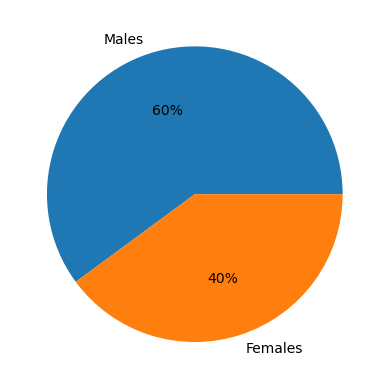

In [16]:
m = (df['Gender'] == 'Male').sum()
f =  (df['Gender'] == 'Female').sum() 
labels = ['Males', 'Females']
plt.pie([m, f], labels= labels, autopct='%.0f%%')
plt.show()

### PreferredLoginDevice Handling

<AxesSubplot:xlabel='PreferredLoginDevice', ylabel='count'>

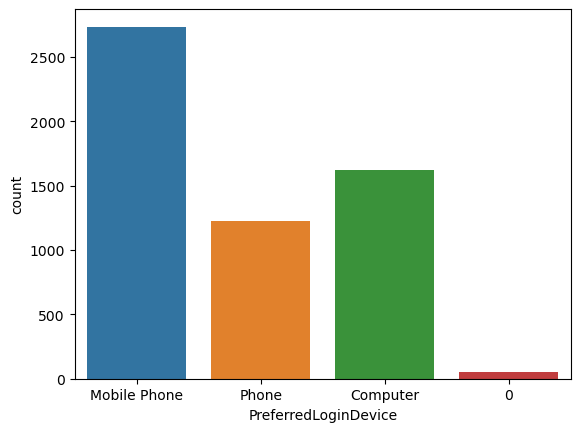

In [17]:
sns.countplot(x=df["PreferredLoginDevice"])

In [18]:
df['PreferredLoginDevice'] = np.where(df['PreferredLoginDevice'] == '0', df['PreferredLoginDevice'].mode() , df['PreferredLoginDevice'])

In [19]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

<AxesSubplot:xlabel='PreferredLoginDevice', ylabel='count'>

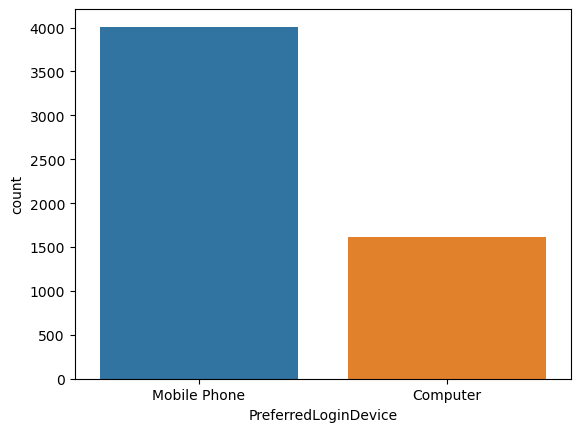

In [20]:
sns.countplot(x=df["PreferredLoginDevice"])

### Prefered Order Category

<AxesSubplot:xlabel='PreferedOrderCat', ylabel='count'>

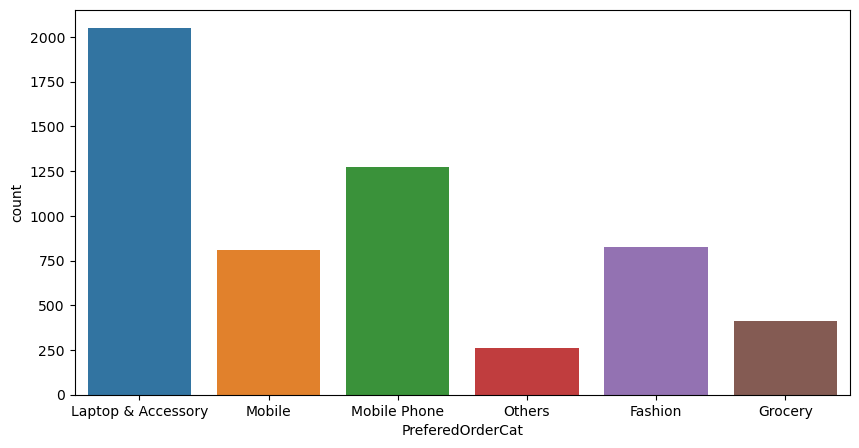

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["PreferedOrderCat"])

In [22]:
df['PreferedOrderCat'] = np.where(df['PreferedOrderCat'] == 'Mobile', 'Mobile Phone' , df['PreferedOrderCat'])

<AxesSubplot:xlabel='PreferedOrderCat', ylabel='count'>

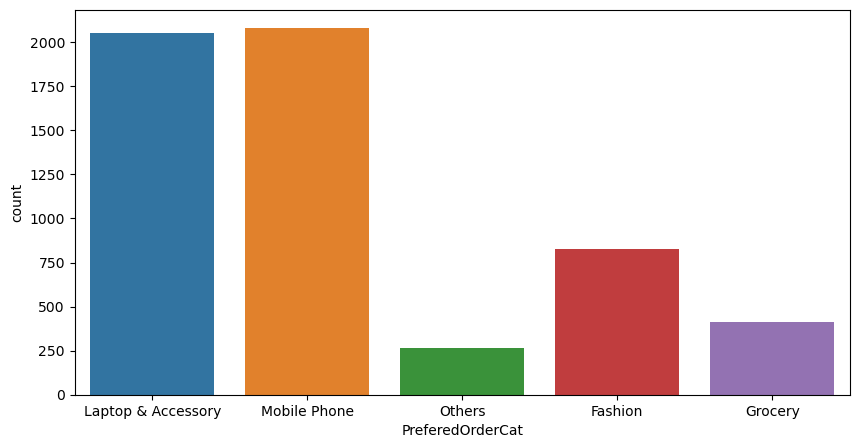

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["PreferedOrderCat"])

### PreferredPaymentMode Handling

In [24]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card', nan], dtype=object)

* Ok notice how there is cc which is --> Credit Card
* and cod which is --> Cash on Delivery

In [25]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card').replace('COD', 'Cash on Delivery')

<AxesSubplot:>

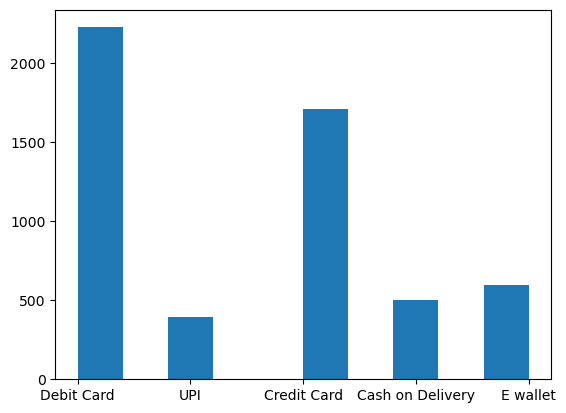

In [26]:
df['PreferredPaymentMode'].hist(grid=False)

# The Nulls

In [27]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         261
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                445
PreferredPaymentMode           200
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered       200
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                  200
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

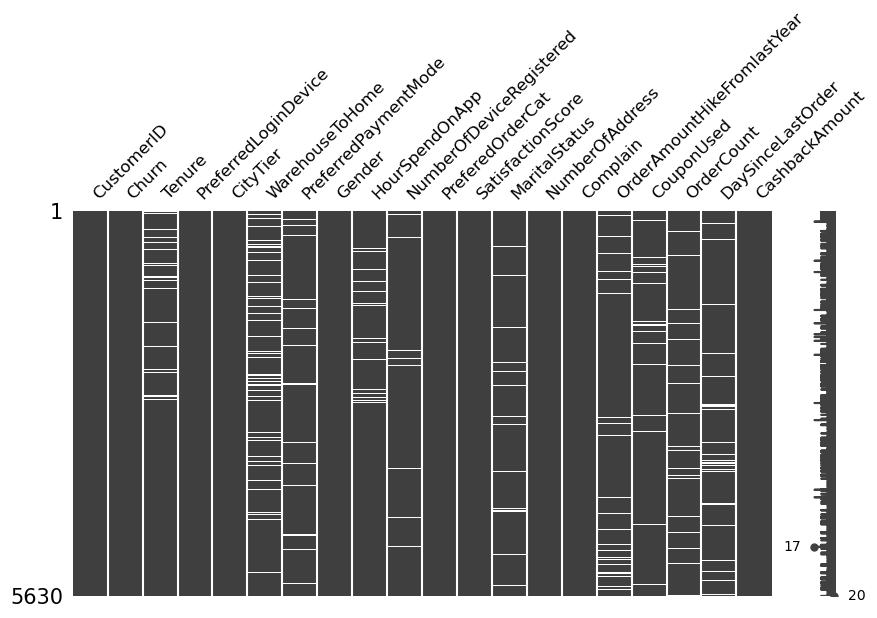

In [28]:
import missingno as msno
msno.matrix(df,figsize=(10,5), fontsize=12);

Cashback Amount Missing Pattern :


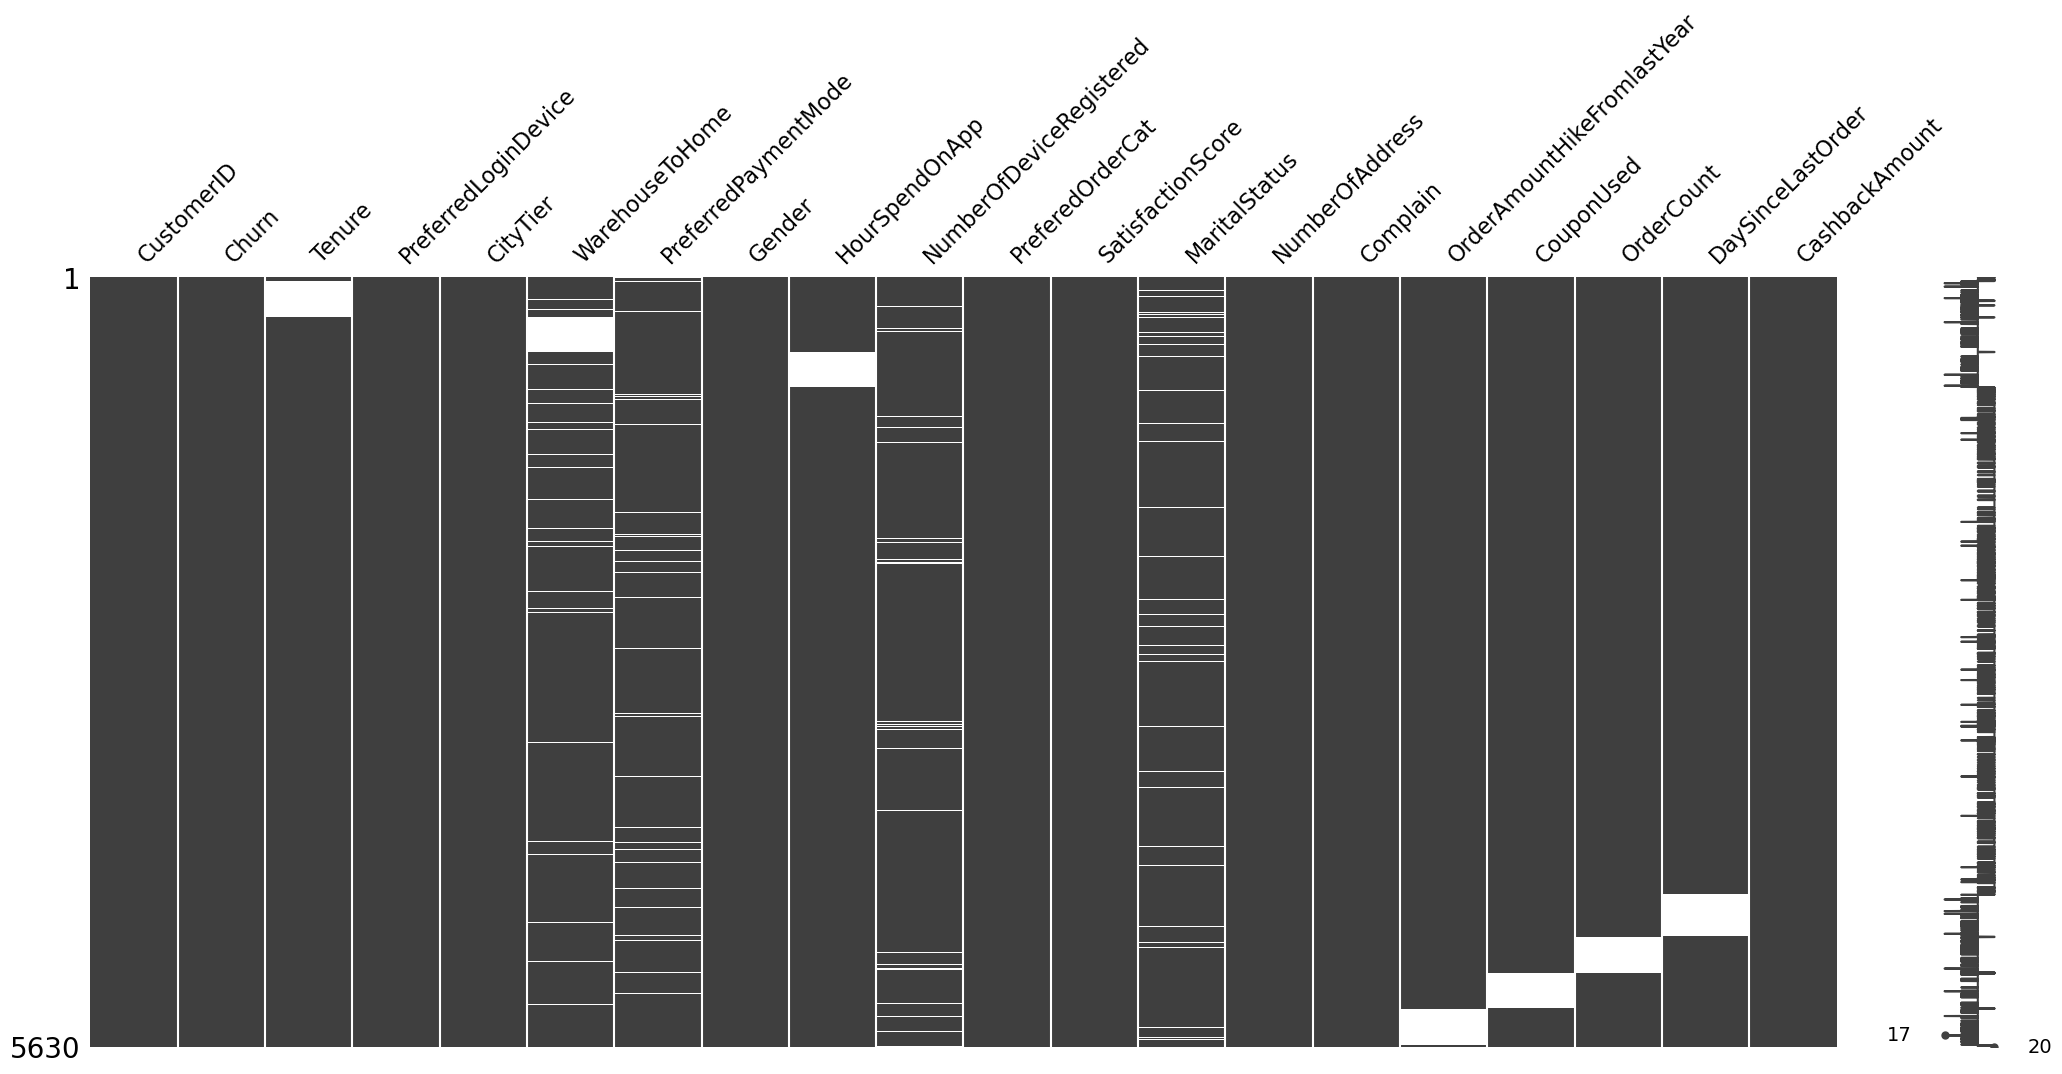

In [29]:
print("Cashback Amount Missing Pattern :")
msno.matrix(df.sort_values(by='CashbackAmount'))
plt.show()

**I found that sorting by the CashbackAmount columns creates a pattern between the missing values and the CashbackAmount columns, which identifies the missingness as missing at random(MAR)
<br> Missing at Random means the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data. <br>
if the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR)**

# Filling the nans with Iterative Imputer

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

vars_with_missing = ['DaySinceLastOrder', 'OrderCount','CouponUsed','OrderAmountHikeFromlastYear','HourSpendOnApp','Tenure','WarehouseToHome','NumberOfDeviceRegistered']

df_missing = df[vars_with_missing]

# Create an instance of the IterativeImputer class
imputer = IterativeImputer( estimator=knn,random_state=0)

# Fit the imputer to the data
imputer.fit(df_missing)

# Generate imputed values for each missing data point
imputed_data = imputer.transform(df_missing)

# Combine imputed data sets to obtain a single data set with imputed values
df_imputed = pd.concat([df.drop(vars_with_missing, axis=1), pd.DataFrame(imputed_data, columns=vars_with_missing)], axis=1)

df_imputed['PreferredPaymentMode'].fillna(df_imputed['PreferredPaymentMode'].mode()[0], inplace=True)
df_imputed['MaritalStatus'].fillna(df_imputed['MaritalStatus'].mode()[0], inplace=True)

In [31]:
df2 = df_imputed.copy()
df2.isnull().sum()

CustomerID                     0
Churn                          0
PreferredLoginDevice           0
CityTier                       0
PreferredPaymentMode           0
Gender                         0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
CashbackAmount                 0
DaySinceLastOrder              0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
HourSpendOnApp                 0
Tenure                         0
WarehouseToHome                0
NumberOfDeviceRegistered       0
dtype: int64

# Handling Outliers

**Winsorizing** <br>
* Where any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself.

## Tenure Outliers

<AxesSubplot:xlabel='Tenure', ylabel='count'>

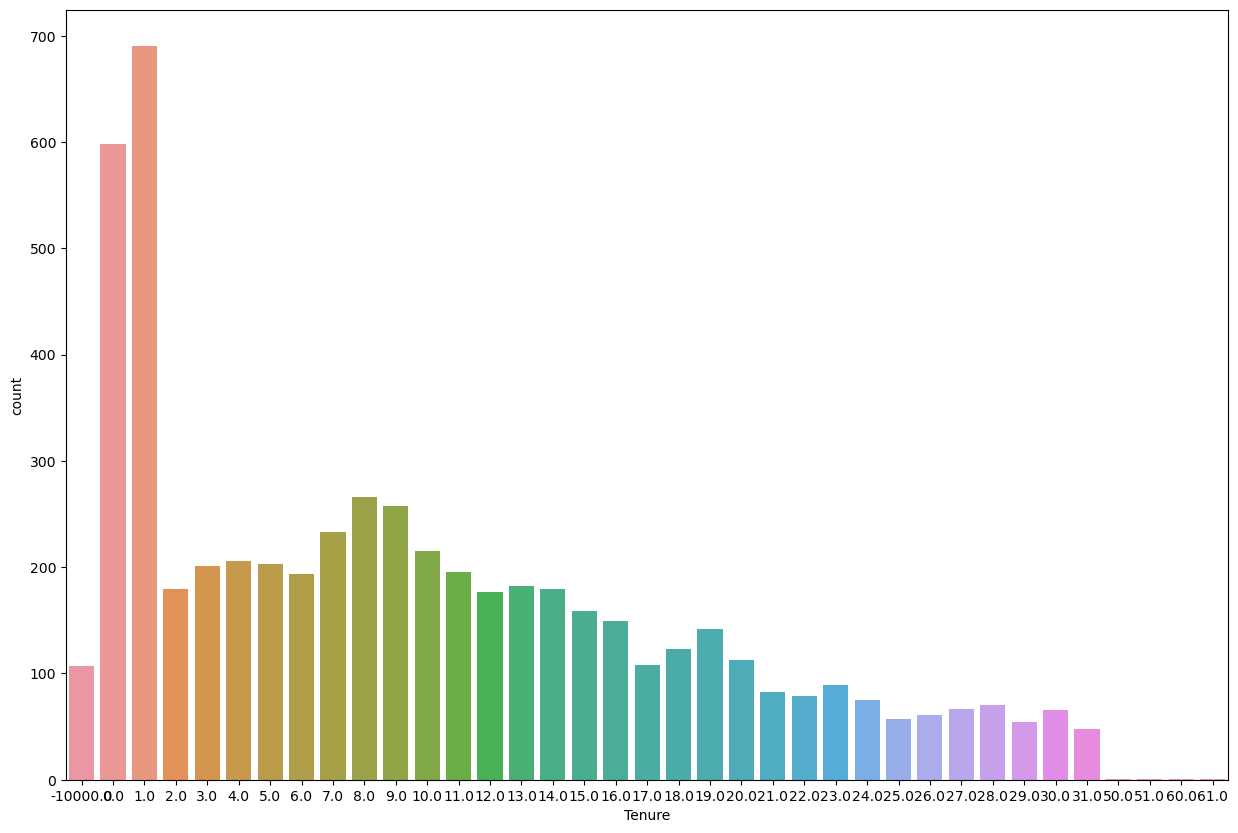

In [32]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df2, x='Tenure')

In [33]:
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(df2, 'Tenure')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -37.0
Upper end outer fence:  54.0


**The upper outer fence for the variable “Tenure” is roughly 54,
while the lower end is below zero. <br>
Because a Tenure below zero is not meaningful, 
and there are some outliers on the right tail. <br>
Now, we can look at values at different percentiles to set k.**

In [34]:
#Explore different quantiles at the upper end
print('90% quantile:   ', df2['Tenure'].quantile(0.90))  
print('92.5% quantile: ', df2['Tenure'].quantile(0.925))
print('95% quantile:   ', df2['Tenure'].quantile(0.95))
print('97.5% quantile: ', df2['Tenure'].quantile(0.975))
print('99% quantile:   ', df2['Tenure'].quantile(0.99))
print('99.9% quantile: ', df2['Tenure'].quantile(0.999))

90% quantile:    23.0
92.5% quantile:  25.0
95% quantile:    27.0
97.5% quantile:  29.0
99% quantile:    30.0
99.9% quantile:  31.0


In [35]:
from scipy.stats.mstats import winsorize

#Winsorize on right-tail
winsorize(df2['Tenure'], limits=(0.05, 0.05), inplace=True)

df2['Tenure'].describe()

count    5630.000000
mean        9.677620
std         8.278076
min         0.000000
25%         2.000000
50%         8.000000
75%        15.000000
max        27.000000
Name: Tenure, dtype: float64

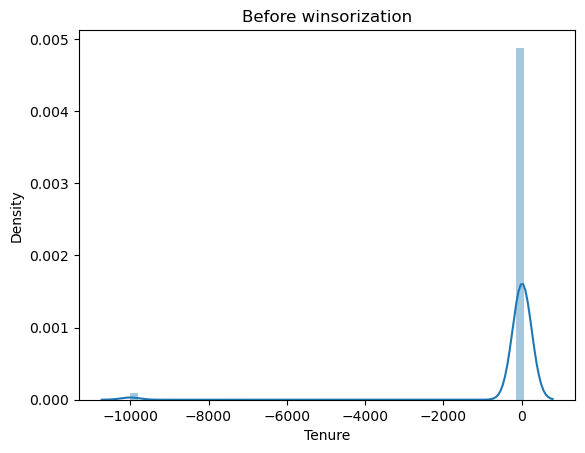

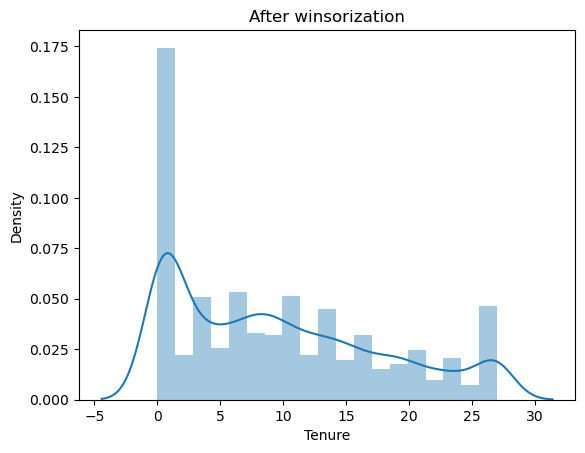

In [36]:
#Distribution plot: Tenure
sns.distplot(df['Tenure'])
plt.title("Before winsorization")
plt.show()

#New distribution plots 
sns.distplot(df2['Tenure'])
plt.title("After winsorization")
plt.show()

In [37]:
print(df['Tenure'].mean())
print(df2['Tenure'].mean())

-176.22648537902776
9.677619893428064


Winsorize to keep as much data as possible!

<AxesSubplot:>

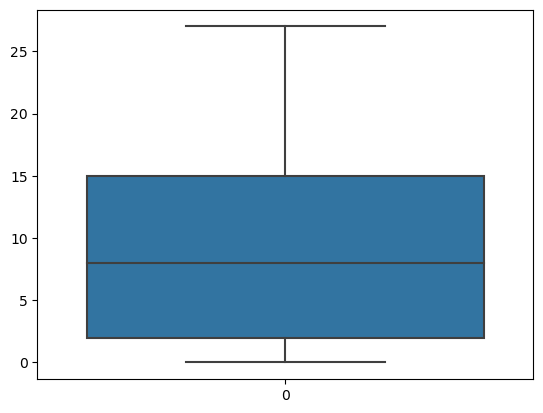

In [38]:
sns.boxplot(df2['Tenure'])

## Satisfaction Score Outiers 

In [39]:
df2['SatisfactionScore'].unique()

array([     2,      3, 589314,      5,      4,      1])

**Ok, so 589314 is obviously an entry error <br>
so, I would assume that the score is 3 as 3 is passive and it wouldn't affect nps score**

In [40]:
df2['SatisfactionScore'] = np.where(df2['SatisfactionScore']==589314, 3, df2['SatisfactionScore'])

<AxesSubplot:>

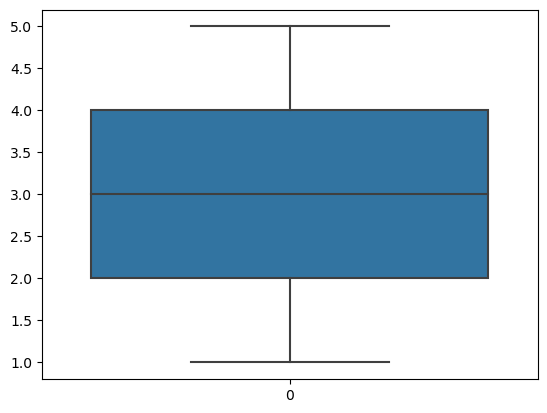

In [41]:
sns.boxplot(df2['SatisfactionScore'])

# Clean Dataset

In [42]:
new_df = df2.copy()
new_df.head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CashbackAmount,DaySinceLastOrder,OrderCount,CouponUsed,OrderAmountHikeFromlastYear,HourSpendOnApp,Tenure,WarehouseToHome,NumberOfDeviceRegistered
0,50001,1,Mobile Phone,3,Debit Card,Female,Laptop & Accessory,2,Single,9,1,159.93,5.0,1.0,1.0,11.0,3.0,4.0,6.0,3.0
1,50002,1,Mobile Phone,1,UPI,Male,Mobile Phone,3,Single,7,1,120.90,0.0,1.0,0.0,15.0,3.0,0.0,8.0,4.0
2,50003,1,Mobile Phone,1,Debit Card,Male,Mobile Phone,3,Single,6,1,120.28,3.0,1.0,0.0,14.0,2.0,17.0,30.0,4.0
3,50004,1,Mobile Phone,3,Debit Card,Male,Laptop & Accessory,3,Single,8,0,134.07,3.0,1.0,0.0,23.0,2.0,0.0,15.0,4.0
4,50005,1,Mobile Phone,1,Credit Card,Male,Mobile Phone,5,Single,3,0,129.60,3.0,1.0,1.0,11.0,3.0,0.0,12.0,3.0


In [43]:
new_df.to_csv('clean_data.csv',index=False)

## We can support the business in various ways including and not limited to :
1. Analyze the number of days since the last order by the customer to create targeted marketing campaigns and offer personalized discounts? <br>
2. Is there any difference in the buying behavior of male and female customers? <br>
3. Provide key insights on why our customers churn and possible churn indicators <br>
4. Analyze the distance between the warehouse and the customer's home and check if it’s relate to complains? <br>
5. Does the number of addresses added by customers impact the churn rate? <br>
6. Design a machine learning model to predict customers are most likely to churn? How you will evaluate your model performance? <br>


# Question 1: 
**Analyze the number of days since the last order by the customer to create targeted marketing campaigns and offer personalized discounts?**

## **Let's categorize the customers on days since last order**

In [44]:
#new_df['Gender'].groupby(["DaySinceLastOrder"]).mean()
q1 = new_df.copy()
# Calculate the average number of days since the last order for all customers
avg_days_since_last_order = q1['DaySinceLastOrder'].mean()

# Create a new column to segment customers based on the number of days since their last order
customer_count_by_segment = q1['Segment'] = pd.cut(q1['DaySinceLastOrder'], bins=[-1,0,5, 10, 15, 20, 47], labels=['Purchased today','1-5 days', '6-10 days', '10-15 days', '15-20 days', 'More than 20 days'])
    
# Print the average number of days since the last order for all customers
print('The average number of days since the last order for all customers is:', avg_days_since_last_order)

# Print the number of customers in each segment
print('Number of customers in each segment:')
print(q1['Segment'].value_counts().sort_index())
#print(customer_count_by_segment)

The average number of days since the last order for all customers is: 4.551154529307283
Number of customers in each segment:
Purchased today       512
1-5 days             3146
6-10 days            1644
10-15 days            278
15-20 days             47
More than 20 days       3
Name: Segment, dtype: int64


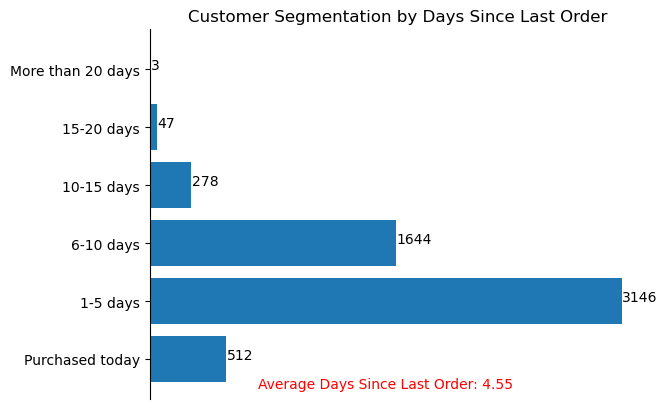

In [45]:
import matplotlib.pyplot as plt

counts = q1['Segment'].value_counts().sort_index()

fig, ax = plt.subplots()

ax.barh(counts.index, counts.values)
ax.set_xlabel('Count of Customers')

for i, v in enumerate(counts.values):
    ax.text(v + 3, i, str(v), color='black')#, fontweight='bold')

#ax.set_yticklabels(counts.index, fontsize=12)
#ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
customer_count_by_segment = q1.groupby('Segment').size()
plt.text(x=customer_count_by_segment.max() / 2, y=-0.5, s=f'Average Days Since Last Order: {avg_days_since_last_order:.2f}', fontsize=10, color='red', ha='center')
plt.title('Customer Segmentation by Days Since Last Order')

plt.show()

#### We can consider the customers that didn't made a purchase in the last **15 days** to be in risk of churn, so we want to know more about these customers and try to personalize campaigns for them

#### How many customer in risk of churn i got and how many have already churned?

In [46]:
q1_risk = q1[q1['DaySinceLastOrder'] >= 15 ]
at_risk_count = q1_risk['DaySinceLastOrder'].count()
print("Count of Customers at risk  = ",at_risk_count)
print("Count of Customers at risk & didn't churn = ",q1_risk['DaySinceLastOrder'][q1_risk['Churn'] == 0].count())
print("Count of Customers at risk & churned already  = ",q1_risk['DaySinceLastOrder'][q1_risk['Churn'] == 1].count())

Count of Customers at risk  =  69
Count of Customers at risk & didn't churn =  64
Count of Customers at risk & churned already  =  5


**We will work at all the customers at risk (69 customers)**

#### What are thier gender split?

In [47]:
q1_risk['Gender'].value_counts() 

Male      42
Female    27
Name: Gender, dtype: int64

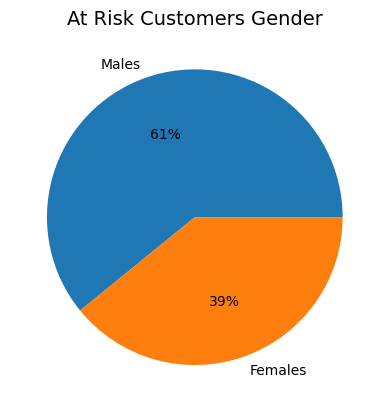

In [48]:
#fig = plt.figure(figsize = (10, 8))

plt.title('At Risk Customers Gender', size = 14)
plt.pie((q1_risk['Gender'].value_counts() / at_risk_count *100),labels = ['Males','Females'], autopct='%.0f%%')
plt.show()

Insight: There are more males who didn't purchase in 15 days than females.

Action: We could personalize marketing campaign for males who didn't purchase in 15 days.

#### **In which city tier are the most customers at risk?**

In [49]:
q1_risk['CityTier'].value_counts()

1    51
3    18
Name: CityTier, dtype: int64

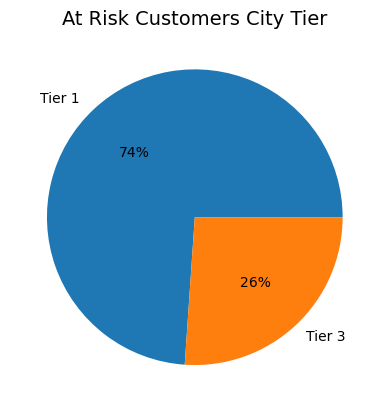

In [50]:
plt.title('At Risk Customers City Tier', size = 14)
plt.pie((q1_risk['CityTier'].value_counts() / at_risk_count *100),labels = ['Tier 1 ','Tier 3'], autopct='%.0f%%')
plt.show()

Insight: The customers at risk of churn are concentrated geocraphicaly at City Tier 1.

Action: We could focus our online adds to be sent to customers who are geocraphicaly at City Tier 1.

### What are the top categories they are most intrested in?

In [51]:
q1_risk['PreferedOrderCat'].value_counts()


Grocery               20
Fashion               15
Others                14
Mobile Phone          12
Laptop & Accessory     8
Name: PreferedOrderCat, dtype: int64

<AxesSubplot:title={'center':'Customers at risk Preferes order category'}, xlabel='PreferedOrderCat', ylabel='count'>

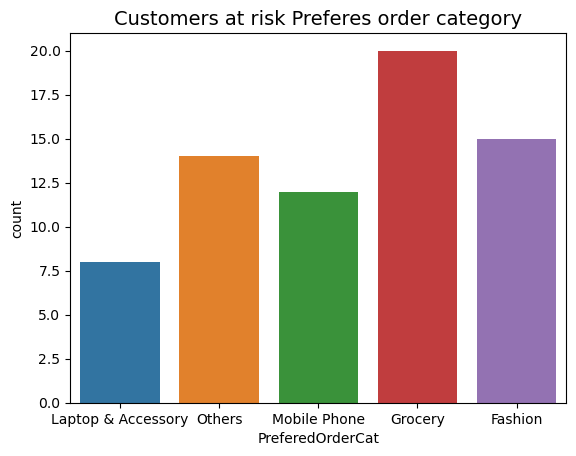

In [52]:
#fig = plt.subplots(figsize = (10, 5))
plt.title('Customers at risk Preferes order category', size = 14)
sns.countplot(data=q1_risk, x = 'PreferedOrderCat')

Inshight: Top 2 caategories the customers at risk interested in are (Grocery & Fashion) 

Action: We can make discounts on these categories for them.

**What are thier martial status?**

In [53]:
q1_risk['MaritalStatus'].value_counts()

Married     39
Single      20
Divorced    10
Name: MaritalStatus, dtype: int64

<AxesSubplot:title={'center':'Customers at risk Marital Status'}, xlabel='MaritalStatus', ylabel='count'>

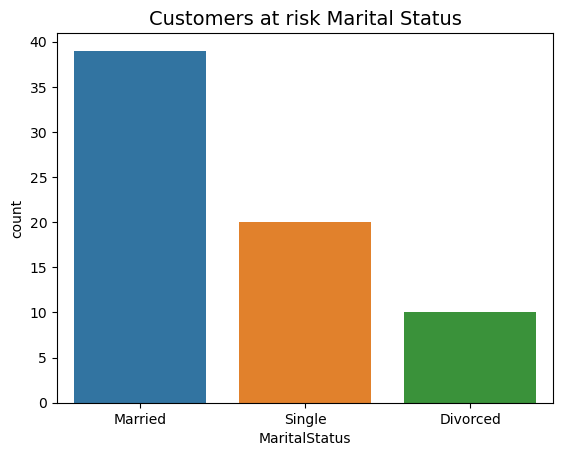

In [54]:
plt.title('Customers at risk Marital Status', size = 14)
sns.countplot(data=q1_risk, x = 'MaritalStatus')

Inshight: Most of these customers are Married

Action: It's adviced to make discounts on products that matter to married people.


**How many of them did raise a complain in the last month?**

In [55]:
q1_risk['Complain'].value_counts()

0    58
1    11
Name: Complain, dtype: int64

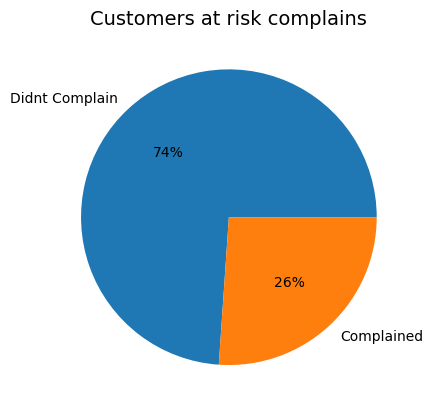

In [56]:
plt.title('Customers at risk complains', size = 14)
plt.pie((q1_risk['CityTier'].value_counts() / at_risk_count *100),labels = ['Didnt Complain','Complained'], autopct='%.0f%%')
plt.show()



Inshight: Only 26% of them raised complaints last month, So maybe it's not corelated with them not buying in 15 days.

Action: It's adviced to make sure that these complaints are all resolved.


**What is the best channel to communicate with them?**

In [57]:
q1_risk['PreferredLoginDevice'].value_counts()

Mobile Phone    63
Computer         6
Name: PreferredLoginDevice, dtype: int64

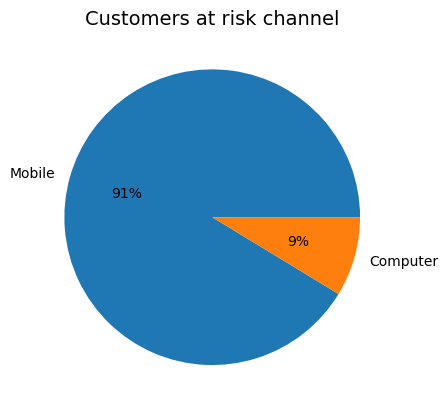

In [58]:
plt.title('Customers at risk channel', size = 14)
plt.pie((q1_risk['PreferredLoginDevice'].value_counts() / at_risk_count *100),labels = ['Mobile','Computer'], autopct='%.0f%%')
plt.show()



Inshight: Over 90% of them prefer using mobile phone than computer

Action: It's adviced to comunicate with them and sending them the discounts through SMS massages and phone calls not with emails.


# Q1 Conclusion:

**Actionable Insights:**
* The Average days since last order is **4.55**.
* By segmenting the customers upon days since last order: the least **segment** are customers who didn't purchase in **more than 20 days**.
* We will consider the customers who didn't purchase in more than **15 days** are the **customers at risk**, who needs personalized campaigns.
* There Are **69 customers at risk**, 5 of them have already churned.
* **61%** of these customers **are males**.
* **74%** of these customers lives at **City Tier 1**.
* The most prefered order category (from last month) for these customers is **Grocery**
* The majority of them are **married**.
* Only 26% of them had complaints over the last month, so maybe it dosen't affect their buying behaviour.
* Over **90%** of them uses **mobile phones**.

**Goal: Lowering the Average days since last order**.

**Actions:**
* Personalize the campaigns to be more toward males.
* Focus the ads to be geographicaly towards City Tier 1.
* Offer discounts on "Groceries" to motivate these customers to buy again.
* Offer discounts on products related to married couples.
* Make customer service contact them and make sure all their complains are resolved to avoid churn.
* Do all the communication/discounts/campaigns with them through SMS and calls.

# Question 2:
##### **Is there any difference in the buying behavior of male and female customers?**

In [59]:
new_df.head()

,CustomerID,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,CashbackAmount,DaySinceLastOrder,OrderCount,CouponUsed,OrderAmountHikeFromlastYear,HourSpendOnApp,Tenure,WarehouseToHome,NumberOfDeviceRegistered
0,50001,1,Mobile Phone,3,Debit Card,Female,Laptop & Accessory,2,Single,9,1,159.93,5.0,1.0,1.0,11.0,3.0,4.0,6.0,3.0
1,50002,1,Mobile Phone,1,UPI,Male,Mobile Phone,3,Single,7,1,120.90,0.0,1.0,0.0,15.0,3.0,0.0,8.0,4.0
2,50003,1,Mobile Phone,1,Debit Card,Male,Mobile Phone,3,Single,6,1,120.28,3.0,1.0,0.0,14.0,2.0,17.0,30.0,4.0
3,50004,1,Mobile Phone,3,Debit Card,Male,Laptop & Accessory,3,Single,8,0,134.07,3.0,1.0,0.0,23.0,2.0,0.0,15.0,4.0
4,50005,1,Mobile Phone,1,Credit Card,Male,Mobile Phone,5,Single,3,0,129.60,3.0,1.0,1.0,11.0,3.0,0.0,12.0,3.0


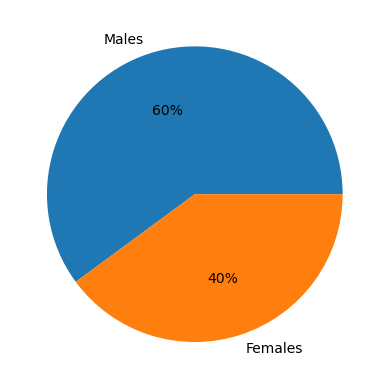

In [60]:
m = (new_df['Gender'] == 'Male').sum()
f =  (new_df['Gender'] == 'Female').sum() 
labels = ['Males', 'Females']
plt.pie([m, f], labels= labels, autopct='%.0f%%')
plt.show()

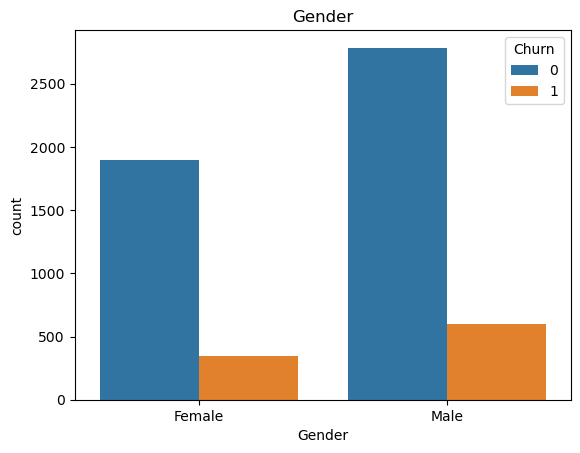

In [61]:
sns.countplot(x=new_df['Gender'], hue = new_df['Churn'])
plt.title('Gender')
plt.show()

**The number of churned males are larger than the churned females <br>
And the number of non churned males is also larger than females <br>
But, is this true? or because the percentage of males is dominant next to females in the dataset in the first place 80:60<br>
So, we have to check the rate/percentage.**

In [62]:
churn = (new_df['Churn'] == 1).sum()
nochurn =  (new_df['Churn'] == 0).sum()
males = (new_df['Gender']=="Male").sum()
females = (new_df['Gender']=="Female").sum()
churned_males = ((new_df['Churn'] == 1) & (new_df['Gender']=="Male")).sum()
churned_females = ((new_df['Churn'] == 1) & (new_df['Gender']=="Female")).sum()
nochurn_males = ((new_df['Churn'] == 0) & (new_df['Gender']=="Male")).sum()
nochurn_females = ((new_df['Churn'] == 0) & (new_df['Gender']=="Female")).sum()


males_churn_rate = (churned_males / males)*100
females_churn_rate = (churned_females / females)*100

In [63]:
print('Churned Males Rate :' ,males_churn_rate)
print('Churned Females Rate :', females_churn_rate)

Churned Males Rate : 17.73049645390071
Churned Females Rate : 15.49421193232413


**It appears that the number of churned males is still larger than the churned females**

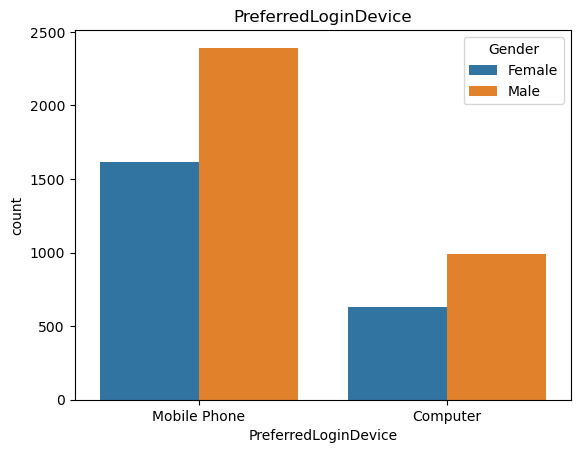

In [64]:
#So, what's each preferred Login Device?
sns.countplot(x=new_df['PreferredLoginDevice'], hue = new_df['Gender'])
plt.title('PreferredLoginDevice')
plt.show()

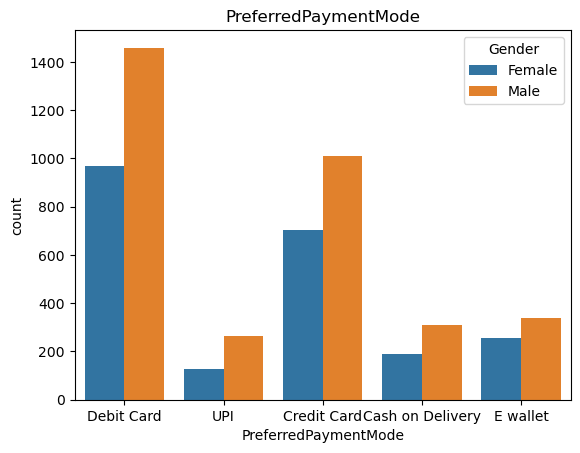

In [65]:
#What about PreferredPaymentMode
sns.countplot(x=new_df['PreferredPaymentMode'], hue = new_df['Gender'])
plt.title('PreferredPaymentMode')
plt.show()

In [66]:
#used for heatmaps below
m = new_df[(new_df['Gender'] == "Male")]
f = new_df[(new_df['Gender'] == "Female")]

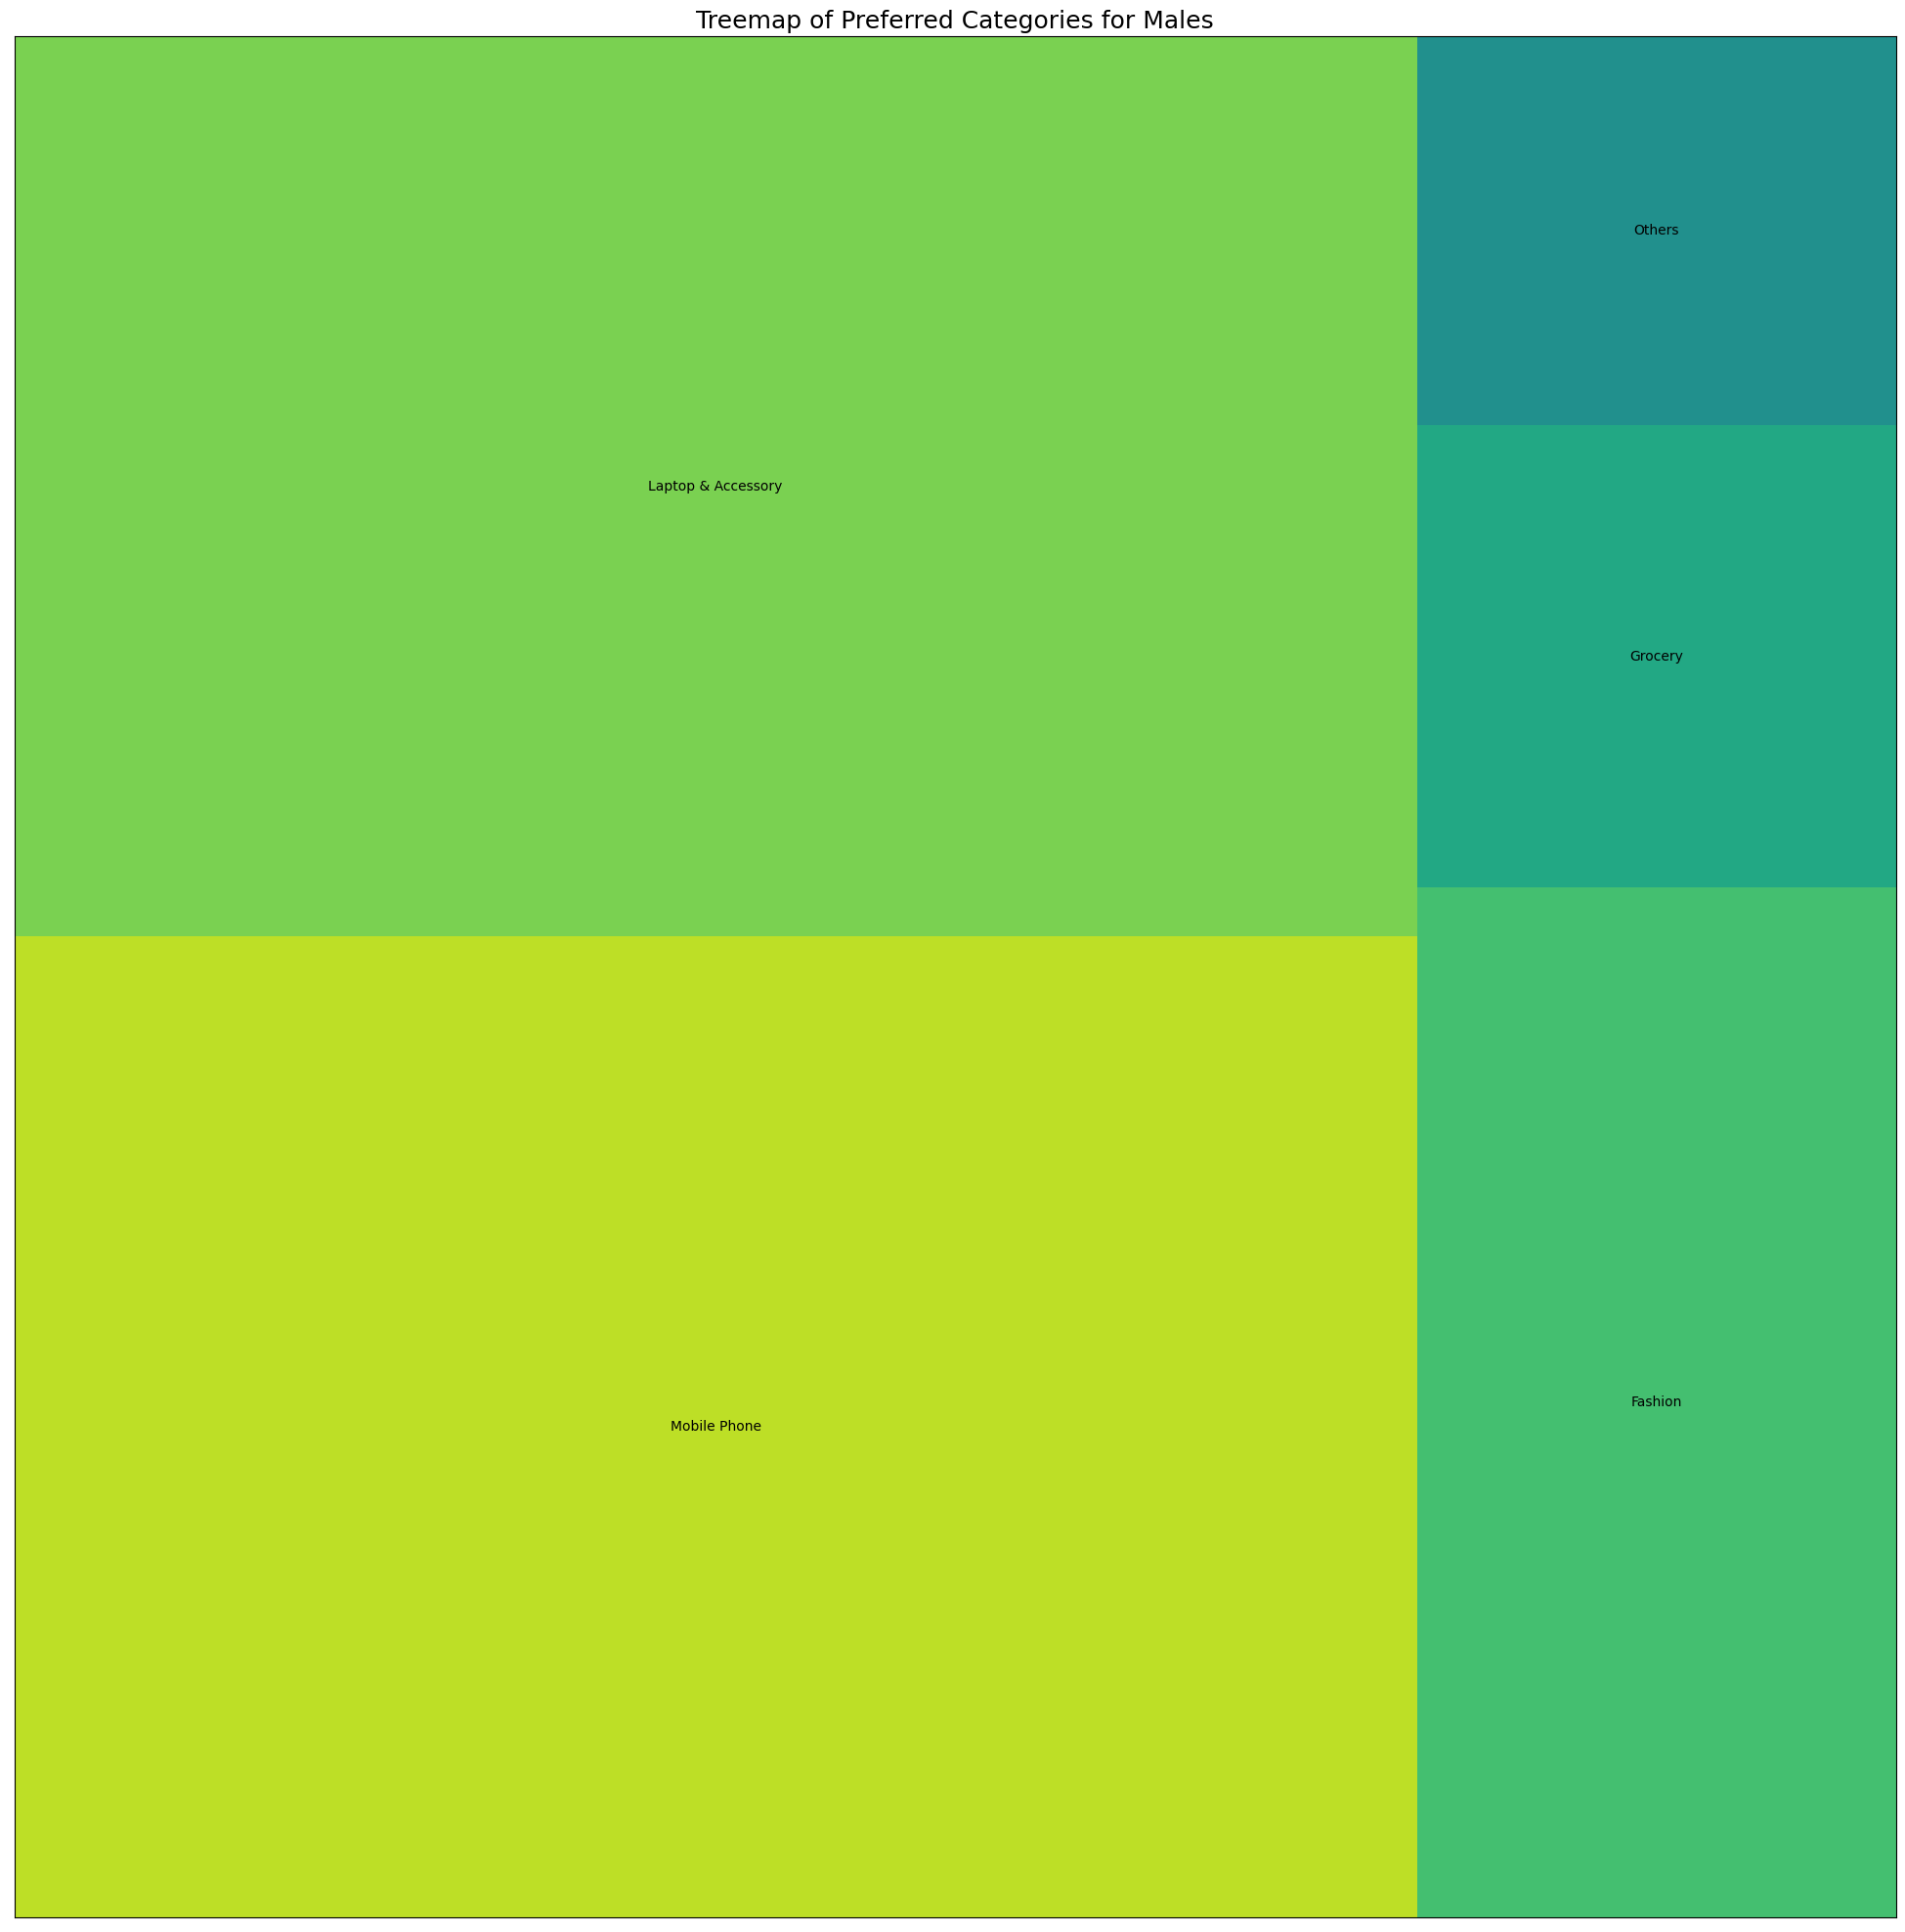

In [67]:
#Let's see each's preferred ordered Category
import squarify

fig = plt.figure(figsize=(25, 21))
marrimeko=m.PreferedOrderCat.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['PreferedOrderCat'].values,label=marrimeko.index,
               color=sns.color_palette('viridis_r', 9), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of Preferred Categories for Males", fontsize=18)
plt.show();

<AxesSubplot:>

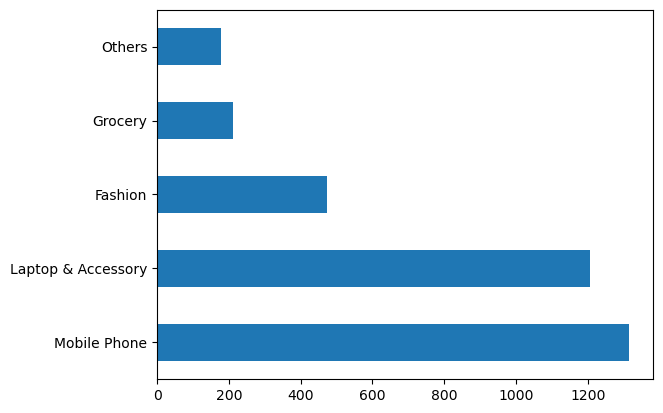

In [68]:
m['PreferedOrderCat'].value_counts().plot(kind='barh')

**So, if the top category of males is mobile phones, what is the exact % that buys mobile phones over these other things?**

In [69]:
((m['PreferedOrderCat']=='Mobile Phone').sum()/males)*100

38.88888888888889

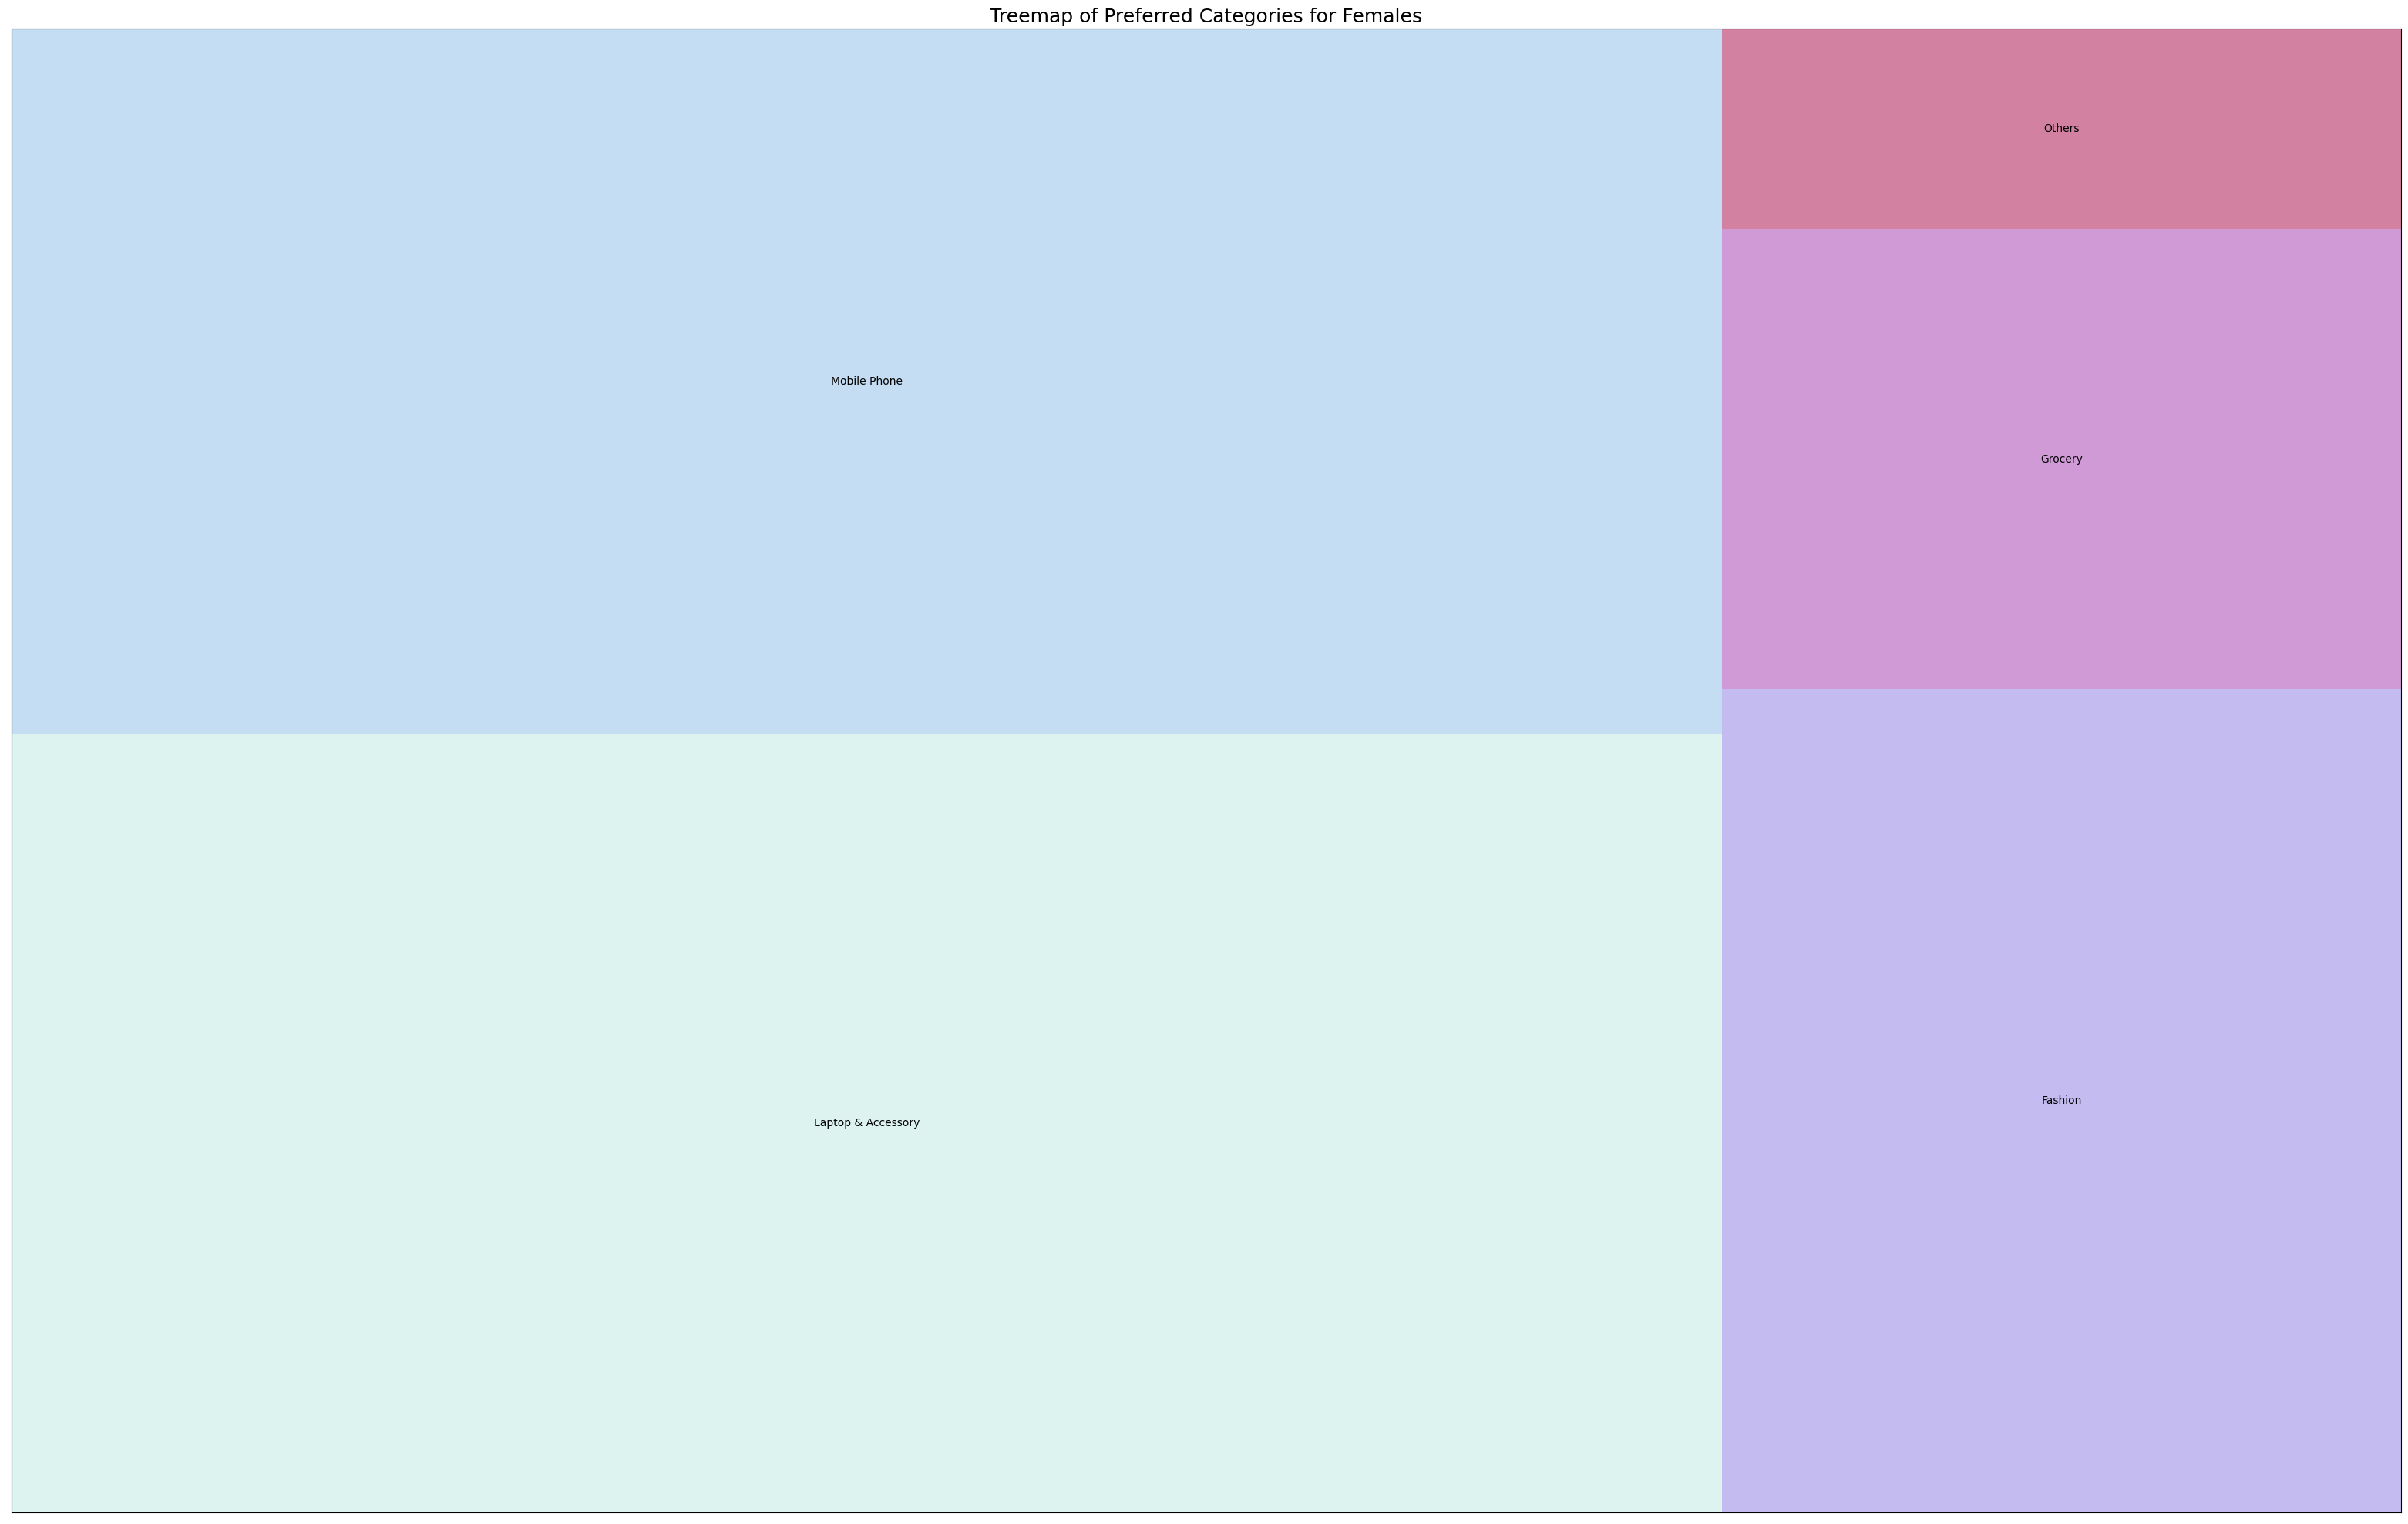

In [70]:
marrimeko=f.PreferedOrderCat.value_counts().to_frame()
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(sizes=marrimeko['PreferedOrderCat'].values,label=marrimeko.index,
              color=sns.color_palette('cubehelix_r', 12), alpha=1)
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of Preferred Categories for Females", fontsize=18)
plt.show();

<AxesSubplot:>

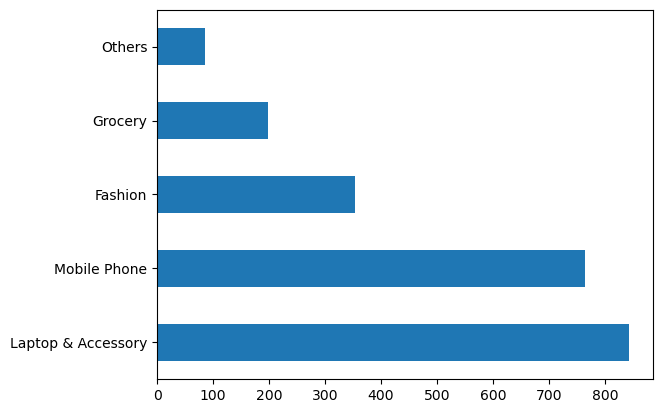

In [71]:
f['PreferedOrderCat'].value_counts().plot(kind='barh')

**For females, the laptop and accessory wins the most preferred category**

In [72]:
#percentage of females who prefer Laptop & Accessory over other categories
((f['PreferedOrderCat']=='Laptop & Accessory').sum()/females)*100

37.57791629563669

**As the second cat for females is Mobile Phones, which is the first for males, let's see the difference**

In [73]:
mob_mal = ((m['PreferedOrderCat']=='Mobile Phone').sum()/males)*100
mob_fem = ((f['PreferedOrderCat']=='Mobile Phone').sum()/females)*100

mob_mal-mob_fem

4.872860393786489

**Almost 5% difference between males and females in their preference to Mobile Phones over other categories**

In [74]:
#MaritialStatus
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sngl_m = (m['MaritalStatus'] == "Single").sum()
dvrc_m =  (m['MaritalStatus'] == "Divorced").sum()
mrry_m =  (m['MaritalStatus'] == "Married").sum()
sngl_f = (f['MaritalStatus'] == "Single").sum()
dvrc_f =  (f['MaritalStatus'] == "Divorced").sum()
mrry_f =  (f['MaritalStatus'] == "Married").sum()


labels = ['Single', 'Divorced', 'Married']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[sngl_m, dvrc_m, mrry_m], name="Males Marital Status"),1, 1)
fig.add_trace(go.Pie(labels=labels, values=[sngl_f, dvrc_f, mrry_f], name="Females Marital Status"),1, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4)

fig.update_layout(
    title_text="Marital Status",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Males', x=0.1925, y=0.5, font_size=20, showarrow=False),
                 dict(text='Females', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [75]:
#So, what is the order count for each martial state?
#males
m.groupby('MaritalStatus').agg(orders_count=('OrderCount','sum')).reset_index()

,MaritalStatus,orders_count
0,Divorced,1513.0
1,Married,5753.0
2,Single,2709.0


In [76]:
#females
f.groupby('MaritalStatus').agg(orders_count=('OrderCount','sum')).reset_index()

,MaritalStatus,orders_count
0,Divorced,1084.0
1,Married,3784.0
2,Single,2137.0


In [77]:
#Avg order count for each martial status
print('Married Males: ', m.query("MaritalStatus == 'Married'")['OrderCount'].mean())
print('Single Males: ', m.query("MaritalStatus == 'Single'")['OrderCount'].mean())
print('Divorced Males: ', m.query("MaritalStatus == 'Divorced'")['OrderCount'].mean())
print('Married Males: ', f.query("MaritalStatus == 'Married'")['OrderCount'].mean())
print('Single Males: ', f.query("MaritalStatus == 'Single'")['OrderCount'].mean())
print('Divorced Males: ', f.query("MaritalStatus == 'Divorced'")['OrderCount'].mean())

Married Males:  3.0263019463440295
Single Males:  2.7117117117117115
Divorced Males:  3.12603305785124
Married Males:  3.2122241086587437
Single Males:  2.939477303988996
Divorced Males:  3.1788856304985336


<AxesSubplot:xlabel='NumberOfAddress', ylabel='count'>

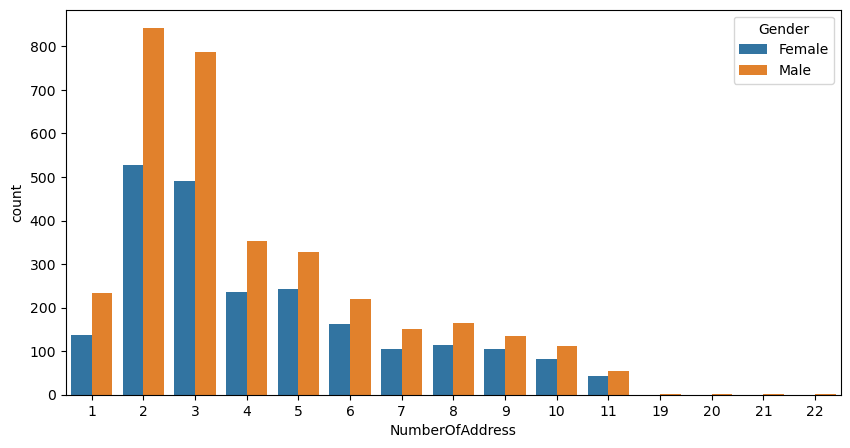

In [78]:
#Number of Addresses
fig = plt.subplots(figsize = (10, 5))
sns.countplot(data=new_df, x = 'NumberOfAddress', hue = 'Gender')

In [79]:
print('Avg No of Addresses for Males: ', m['NumberOfAddress'].median())
print('Avg No of Addresses for Females: ', f['NumberOfAddress'].median())

Avg No of Addresses for Males:  3.0
Avg No of Addresses for Females:  3.0


<AxesSubplot:xlabel='Complain', ylabel='count'>

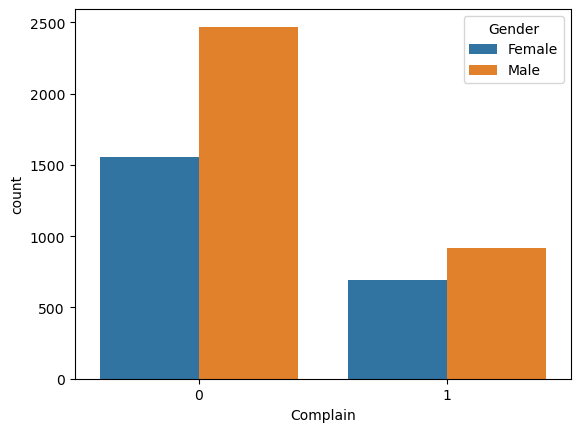

In [80]:
#complains
sns.countplot(data=new_df, x = 'Complain', hue = 'Gender')

In [81]:
complain = (new_df['Complain'] == 1).sum()
no_complain =  (new_df['Complain'] == 0).sum()

males = (new_df['Gender']=="Male").sum()
females = (new_df['Gender']=="Female").sum()

comp_males = ((new_df['Complain'] == 1) & (new_df['Gender']=="Male")).sum()
comp_females = ((new_df['Complain'] == 1) & (new_df['Gender']=="Female")).sum()

males_comp_rate = (comp_males / complain)*100
females_comp_rate = (comp_females / complain)*100

print('From all complains:')
print( males_comp_rate, '% were males')
print(females_comp_rate, '% were females')

From all complains:
56.98254364089775 % were males
43.01745635910225 % were females


In [82]:

#Dividing the coupon column into those who used and those who haven't
no_coupon = new_df['CouponUsed']==0
coupon = new_df['CouponUsed']!=0

coupon.sum(), no_coupon.sum()

(4549, 1081)

In [83]:
#Dividing the coupon column into those who used and those who haven't according to its gender
m['no_coupon'] = m['CouponUsed']==0
m['coupon'] = m['CouponUsed']!=0

f['no_coupon'] = f['CouponUsed']==0
f['coupon'] = f['CouponUsed']!=0

In [84]:
print('%of males who havent used coupons vs all males', (m['no_coupon'].sum())/males *100)
print('%of females who havent used coupons vs all females', (f['no_coupon'].sum())/females *100)

print('-------------------------------------------------------')

print('%of males who have used coupons vs all males', (m['coupon'].sum())/males *100)
print('%of females who have used coupons vs all females', (f['coupon'].sum())/females *100)

%of males who havent used coupons vs all males 19.326241134751772
%of females who havent used coupons vs all females 19.01157613535174
-------------------------------------------------------
%of males who have used coupons vs all males 80.67375886524822
%of females who have used coupons vs all females 80.98842386464827


<AxesSubplot:xlabel='OrderAmountHikeFromlastYear', ylabel='count'>

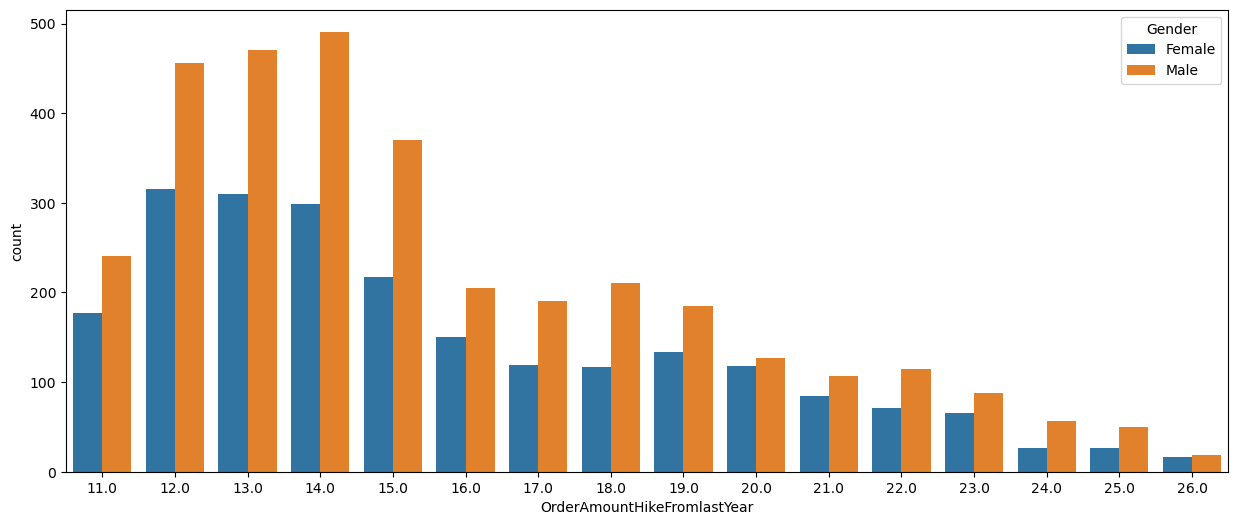

In [85]:
#OrderAmountHikeFromlastYear
plt.figure(figsize=(15, 6))
sns.countplot(data=new_df, x='OrderAmountHikeFromlastYear', hue='Gender')

In [86]:
#OrderAmountHikeFromlastYear
print(m['OrderAmountHikeFromlastYear'].mean())
print(f['OrderAmountHikeFromlastYear'].mean())

15.651004728132389
15.663401602849511


<AxesSubplot:xlabel='HourSpendOnApp', ylabel='count'>

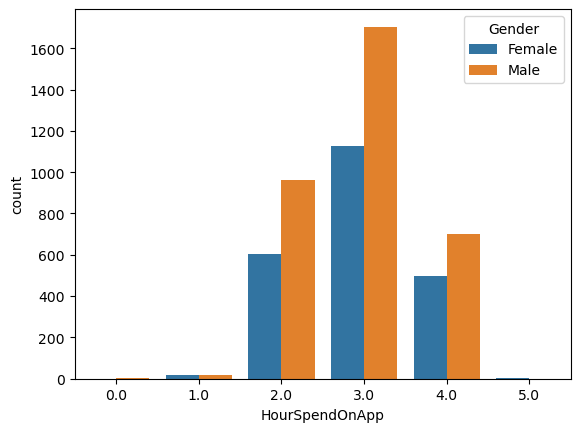

In [87]:
#HourSpendOnApp
sns.countplot(data=new_df, x='HourSpendOnApp', hue='Gender')

In [88]:
#HourSpendOnApp
print(m['HourSpendOnApp'].mean())
print(f['HourSpendOnApp'].mean())

2.911052009456265
2.93766696349065


# Question 2 Insights:

* Rate of churn in males is **17.7%** while the rate of churn in females is **15.4%**. <br>

* Both prefer to login on **Mobile Phone** more.

* When they buy? How do they pay? <br>
The first payment method being **Debit Cards** for both genders, then Credit Cards comes next.


* The preferred ordered Category is **Mobile Phones**, while for females it is **Laptop & Accessory**. <br>
Almost **5% difference between males and females** in their preference to Mobile Phones over other categories.


* It appears that the **order count for Married Couples are the largest** sector for both males and females.

* The median number of addresses is **3** for both males and females 

* There were **1604 complains** in our dataset where: <br>
males' complains were **~57%** <br>
where the females' are **~43%**

* For the coupons I divided the columns into those who used coupons and thos who haven't
there are **4549 coupon users** while 1081 used zero coupons <br>
and the difference in behaviour between the males and females is very little in that matter <br>
only **0.3% diff** between those who used coupons between the two <br>
Almost 81% for both used coupons, while 19% haven't <br>

# Question 3:<br>
**Provide key insights on why our customers churn and possible churn indicators**

In [89]:
import plotly.express as px

Churn_values = new_df['Churn'].value_counts()
sizes = Churn_values.values

fig = px.pie(new_df, values=sizes, names=['Not Churned','Churned'] )
fig.show()

## Analyze customer demographics:- 

### City Tier

In [90]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['CityTier'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn        0    1
CityTier           
1         3134  532
2          194   48
3         1354  368


Chi-square statistic: 40.982404247736355
Degrees of freedom: 2
p-value: 1.2612000812079956e-09


In [91]:
citytier_mean = round(new_df.groupby("CityTier")["Churn"].mean()*100,2).reset_index()
citytier_mean

,CityTier,Churn
0,1,14.51
1,2,19.83
2,3,21.37


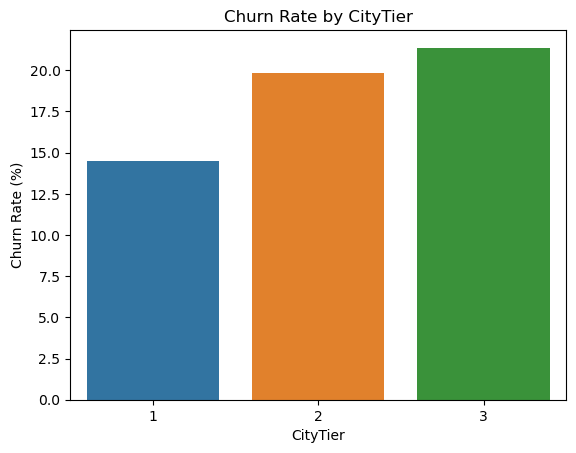

In [92]:
sns.barplot(x="CityTier", y="Churn", data=citytier_mean)

# set the axis labels and title
plt.xlabel("CityTier")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by CityTier")

# show the plot
plt.show()

### Marital Status

In [93]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['MaritalStatus'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn             0    1
MaritalStatus           
Divorced        703  122
Married        2551  328
Single         1267  459


Chi-square statistic: 181.54241742312897
Degrees of freedom: 2
p-value: 3.789351924116012e-40


In [94]:
MS_mean = round(new_df.groupby("MaritalStatus")["Churn"].mean()*100,2).reset_index()
MS_mean

,MaritalStatus,Churn
0,Divorced,14.79
1,Married,11.92
2,Single,26.59


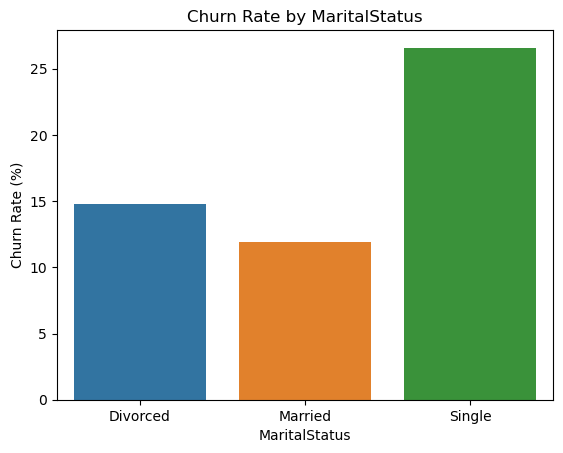

In [95]:
sns.barplot(x="MaritalStatus", y="Churn", data=MS_mean)

# set the axis labels and title
plt.xlabel("MaritalStatus")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by MaritalStatus")

# show the plot
plt.show()

### Gender

In [96]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['Gender'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn      0    1
Gender           
Female  1898  348
Male    2784  600


Chi-square statistic: 4.662908495367532
Degrees of freedom: 1
p-value: 0.030820940334890086


In [97]:
G_mean = round(new_df.groupby("Gender")["Churn"].mean()*100,2).reset_index()
G_mean

,Gender,Churn
0,Female,15.49
1,Male,17.73


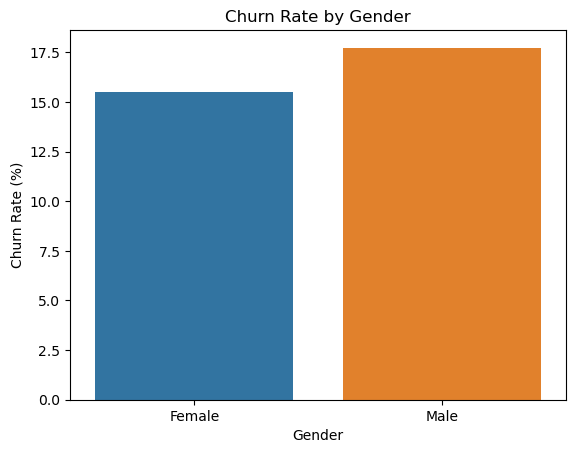

In [98]:
sns.barplot(x="Gender", y="Churn", data=G_mean)

# set the axis labels and title
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Gender")

# show the plot
plt.show()

## Analyze customer behavior :-

### Preferred Login Device


In [99]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['PreferredLoginDevice'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn                    0    1
PreferredLoginDevice           
Computer              1301  319
Mobile Phone          3381  629


Chi-square statistic: 12.936281980683724
Degrees of freedom: 1
p-value: 0.0003222744573838018


In [100]:
PLD_mean = round(new_df.groupby("PreferredLoginDevice")["Churn"].mean()*100,2).reset_index()
PLD_mean

,PreferredLoginDevice,Churn
0,Computer,19.69
1,Mobile Phone,15.69


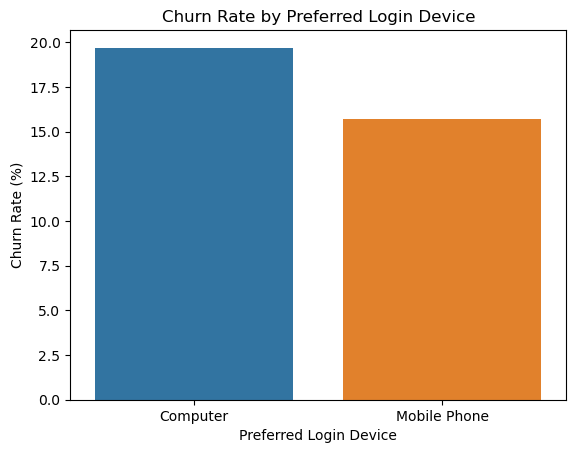

In [101]:
sns.barplot(x="PreferredLoginDevice", y="Churn", data=PLD_mean)

# set the axis labels and title
plt.xlabel("Preferred Login Device")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Preferred Login Device")

# show the plot
plt.show()

### Preferred Payment Mode

In [102]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['PreferredPaymentMode'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn                    0    1
PreferredPaymentMode           
Cash on Delivery       375  125
Credit Card           1469  243
Debit Card            1889  340
E wallet               462  135
UPI                    321   71


Chi-square statistic: 51.01853368757169
Degrees of freedom: 4
p-value: 2.212401219251017e-10


In [103]:
PPM_mean = round(new_df.groupby("PreferredPaymentMode")["Churn"].mean()*100,2).reset_index()
PPM_mean

,PreferredPaymentMode,Churn
0,Cash on Delivery,25.00
1,Credit Card,14.19
2,Debit Card,15.40
3,E wallet,22.61
4,UPI,18.11


### HourSpendOnApp



In [104]:
# Separate the data into two groups 
churned_column = new_df[new_df['Churn'] == 1]['HourSpendOnApp']
non_churned_column = new_df[new_df['Churn'] == 0]['HourSpendOnApp']

# Perform t-test 
statistic, p_value = ttest_ind(churned_column, non_churned_column)

# Print the results
print("t-test statistic:", statistic)
print("P-value:", p_value)

t-test statistic: 0.9048885250948009
P-value: 0.36556318038177704


**Hour Spent On App is not an indicator of churn**

###  Number Of Device Registered



In [105]:
# Separate the data into two groups 
churned_column = new_df[new_df['Churn'] == 1]['NumberOfDeviceRegistered']
non_churned_column = new_df[new_df['Churn'] == 0]['NumberOfDeviceRegistered']

# Perform t-test 
statistic, p_value = ttest_ind(churned_column, non_churned_column)

# Print the results
print("t-test statistic:", statistic)
print("P-value:", p_value)

t-test statistic: 7.868793415570629
P-value: 4.263432221442509e-15


In [106]:
NODR_mean = round(new_df.groupby("NumberOfDeviceRegistered")["Churn"].mean()*100,2).reset_index()
NODR_mean

,NumberOfDeviceRegistered,Churn
0,1.0,9.21
1,2.0,10.07
2,3.0,15.01
3,4.0,16.48
4,5.0,22.58
5,6.0,33.55


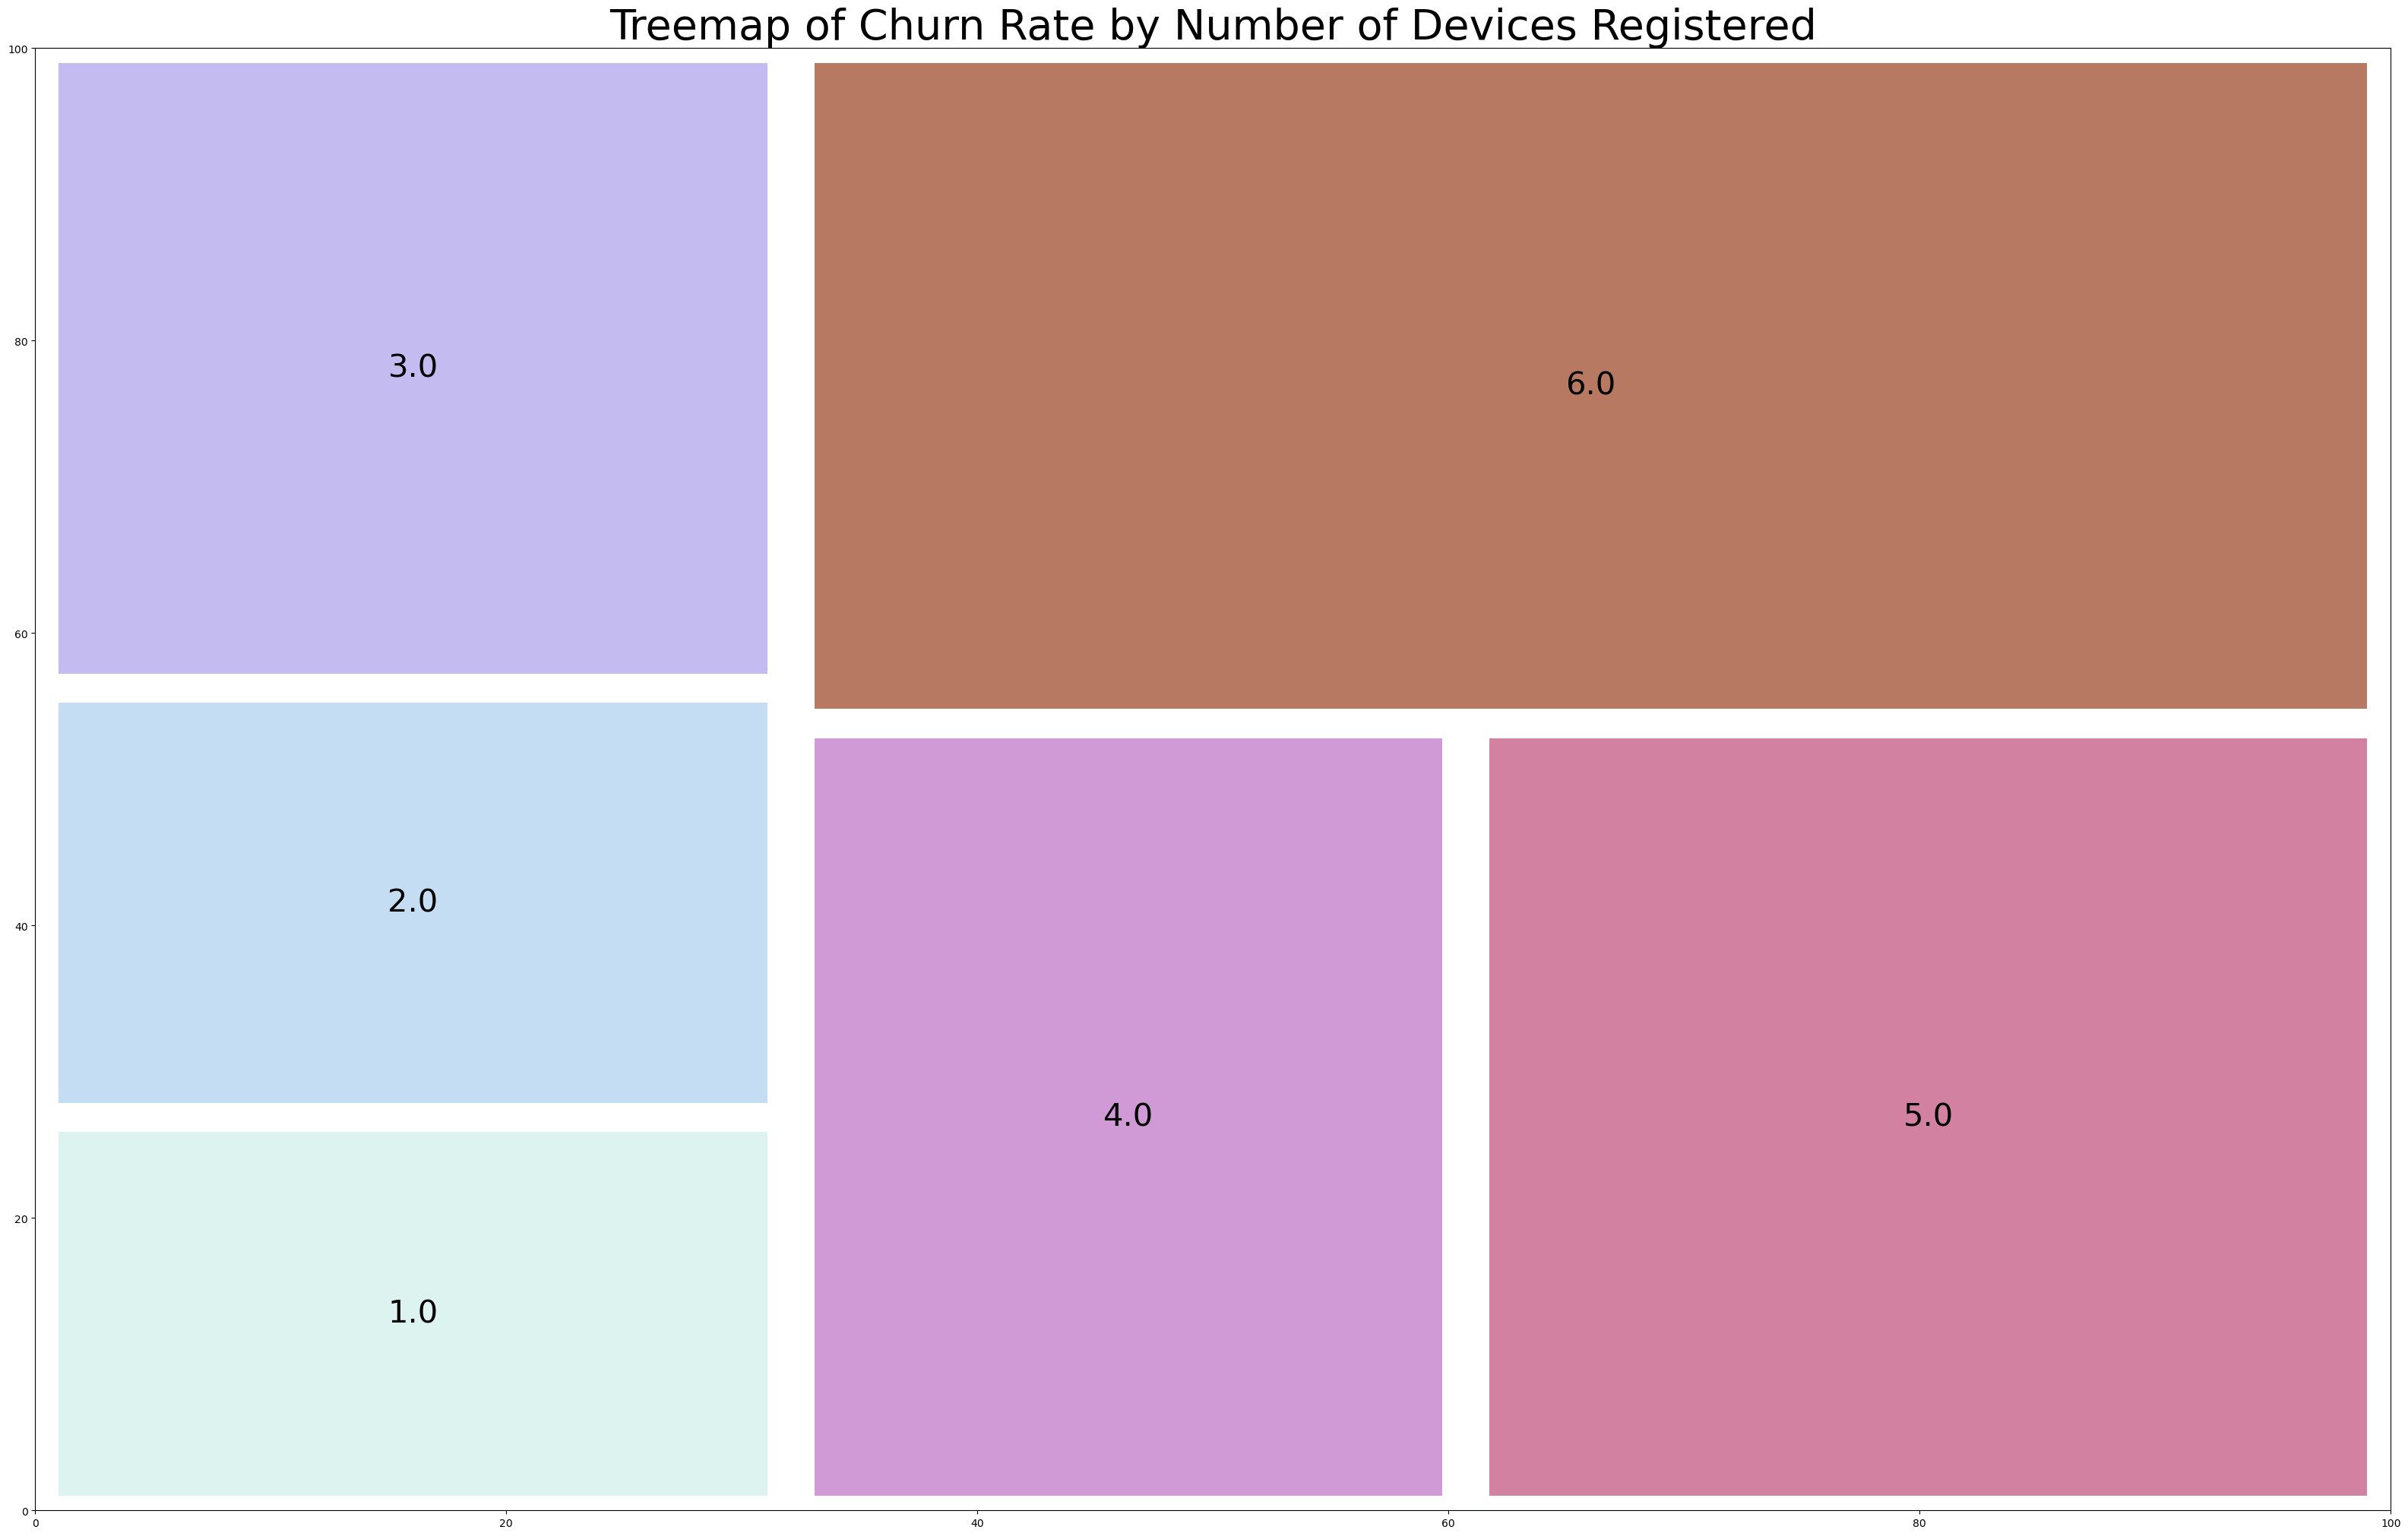

In [107]:
#ax = fig.add_subplot(111, aspect="equal")
axis = squarify.plot(sizes=NODR_mean["Churn"],
                     label=NODR_mean["NumberOfDeviceRegistered"],
                     color=sns.color_palette('cubehelix_r', 12), 
                     alpha=1,
                     pad=1,
                     text_kwargs={'fontsize': 30})
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of Churn Rate by Number of Devices Registered", fontsize=40)
plt.show();

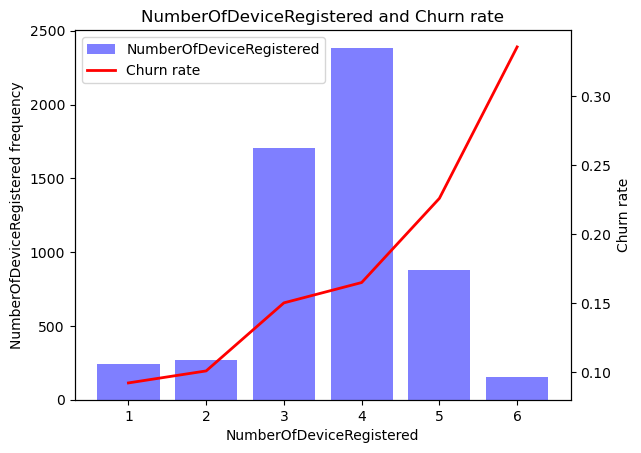

In [108]:
# Calculate churn rate for each tenure
churn_rate = new_df.groupby('NumberOfDeviceRegistered')['Churn'].mean()

# Calculate the frequency of each tenure
NumberOfDeviceRegistered_freq = new_df['NumberOfDeviceRegistered'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(NumberOfDeviceRegistered_freq.index, NumberOfDeviceRegistered_freq.values, color='blue', alpha=0.5, label='NumberOfDeviceRegistered')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('NumberOfDeviceRegistered')
ax1.set_ylabel('NumberOfDeviceRegistered frequency')
ax2.set_ylabel('Churn rate')
plt.title('NumberOfDeviceRegistered and Churn rate')

# Add the legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Display the chart
plt.show()

## Number Of Address

In [109]:
new_df["NumberOfAddress"].skew()

1.0886393829995942

In [110]:
from scipy.stats import mannwhitneyu

# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['NumberOfAddress']
non_churned_column = new_df[new_df['Churn'] == 0]['NumberOfAddress']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 2316556.5
P-value: 0.03049724563723119


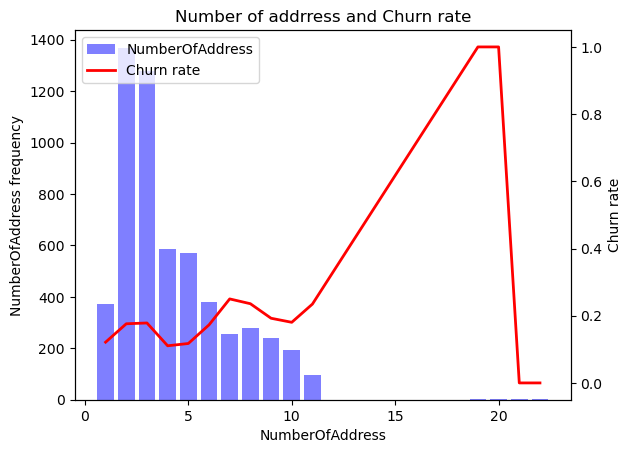

In [111]:
# Calculate churn rate for each tenure
churn_rate = new_df.groupby('NumberOfAddress')['Churn'].mean()

# Calculate the frequency of each tenure
NumberOfAddress_freq = new_df['NumberOfAddress'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(NumberOfAddress_freq.index, NumberOfAddress_freq.values, color='blue', alpha=0.5, label='NumberOfAddress')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('NumberOfAddress')
ax1.set_ylabel('NumberOfAddress frequency')
ax2.set_ylabel('Churn rate')
plt.title('Number of addrress and Churn rate')

# Add the legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Display the chart
plt.show()

NumberOfAddress_bins
(0, 5]      0.154656
(5, 10]     0.205033
(10, 15]    0.234694
(15, 20]    1.000000
Name: Churn, dtype: float64


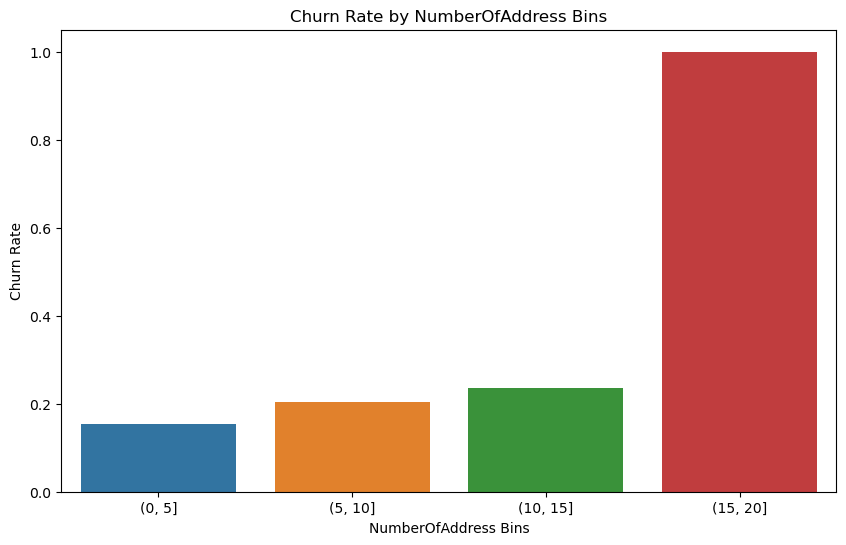

In [112]:
# Create bins for Tenure
bins = np.arange(0, new_df['NumberOfAddress'].max() + 1, 5)
new_df['NumberOfAddress_bins'] = pd.cut(new_df['NumberOfAddress'], bins)

# Calculate churn rate for each bin
churn_rate_by_bin = new_df.groupby('NumberOfAddress_bins')['Churn'].mean()
print(churn_rate_by_bin)

# Visualize churn rate by Tenure bin
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_bin.index, y=churn_rate_by_bin.values)
plt.ylabel('Churn Rate')
plt.xlabel('NumberOfAddress Bins')
plt.title('Churn Rate by NumberOfAddress Bins')
plt.show()

##  Prefered Order Category

In [113]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['PreferedOrderCat'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn                  0    1
PreferedOrderCat             
Fashion              698  128
Grocery              390   20
Laptop & Accessory  1840  210
Mobile Phone        1510  570
Others               244   20


Chi-square statistic: 288.5977863034404
Degrees of freedom: 4
p-value: 3.119243404287749e-61


In [114]:
POC_mean = round(new_df.groupby("PreferedOrderCat")["Churn"].mean()*100,2).reset_index()
POC_mean

,PreferedOrderCat,Churn
0,Fashion,15.50
1,Grocery,4.88
2,Laptop & Accessory,10.24
3,Mobile Phone,27.40
4,Others,7.58


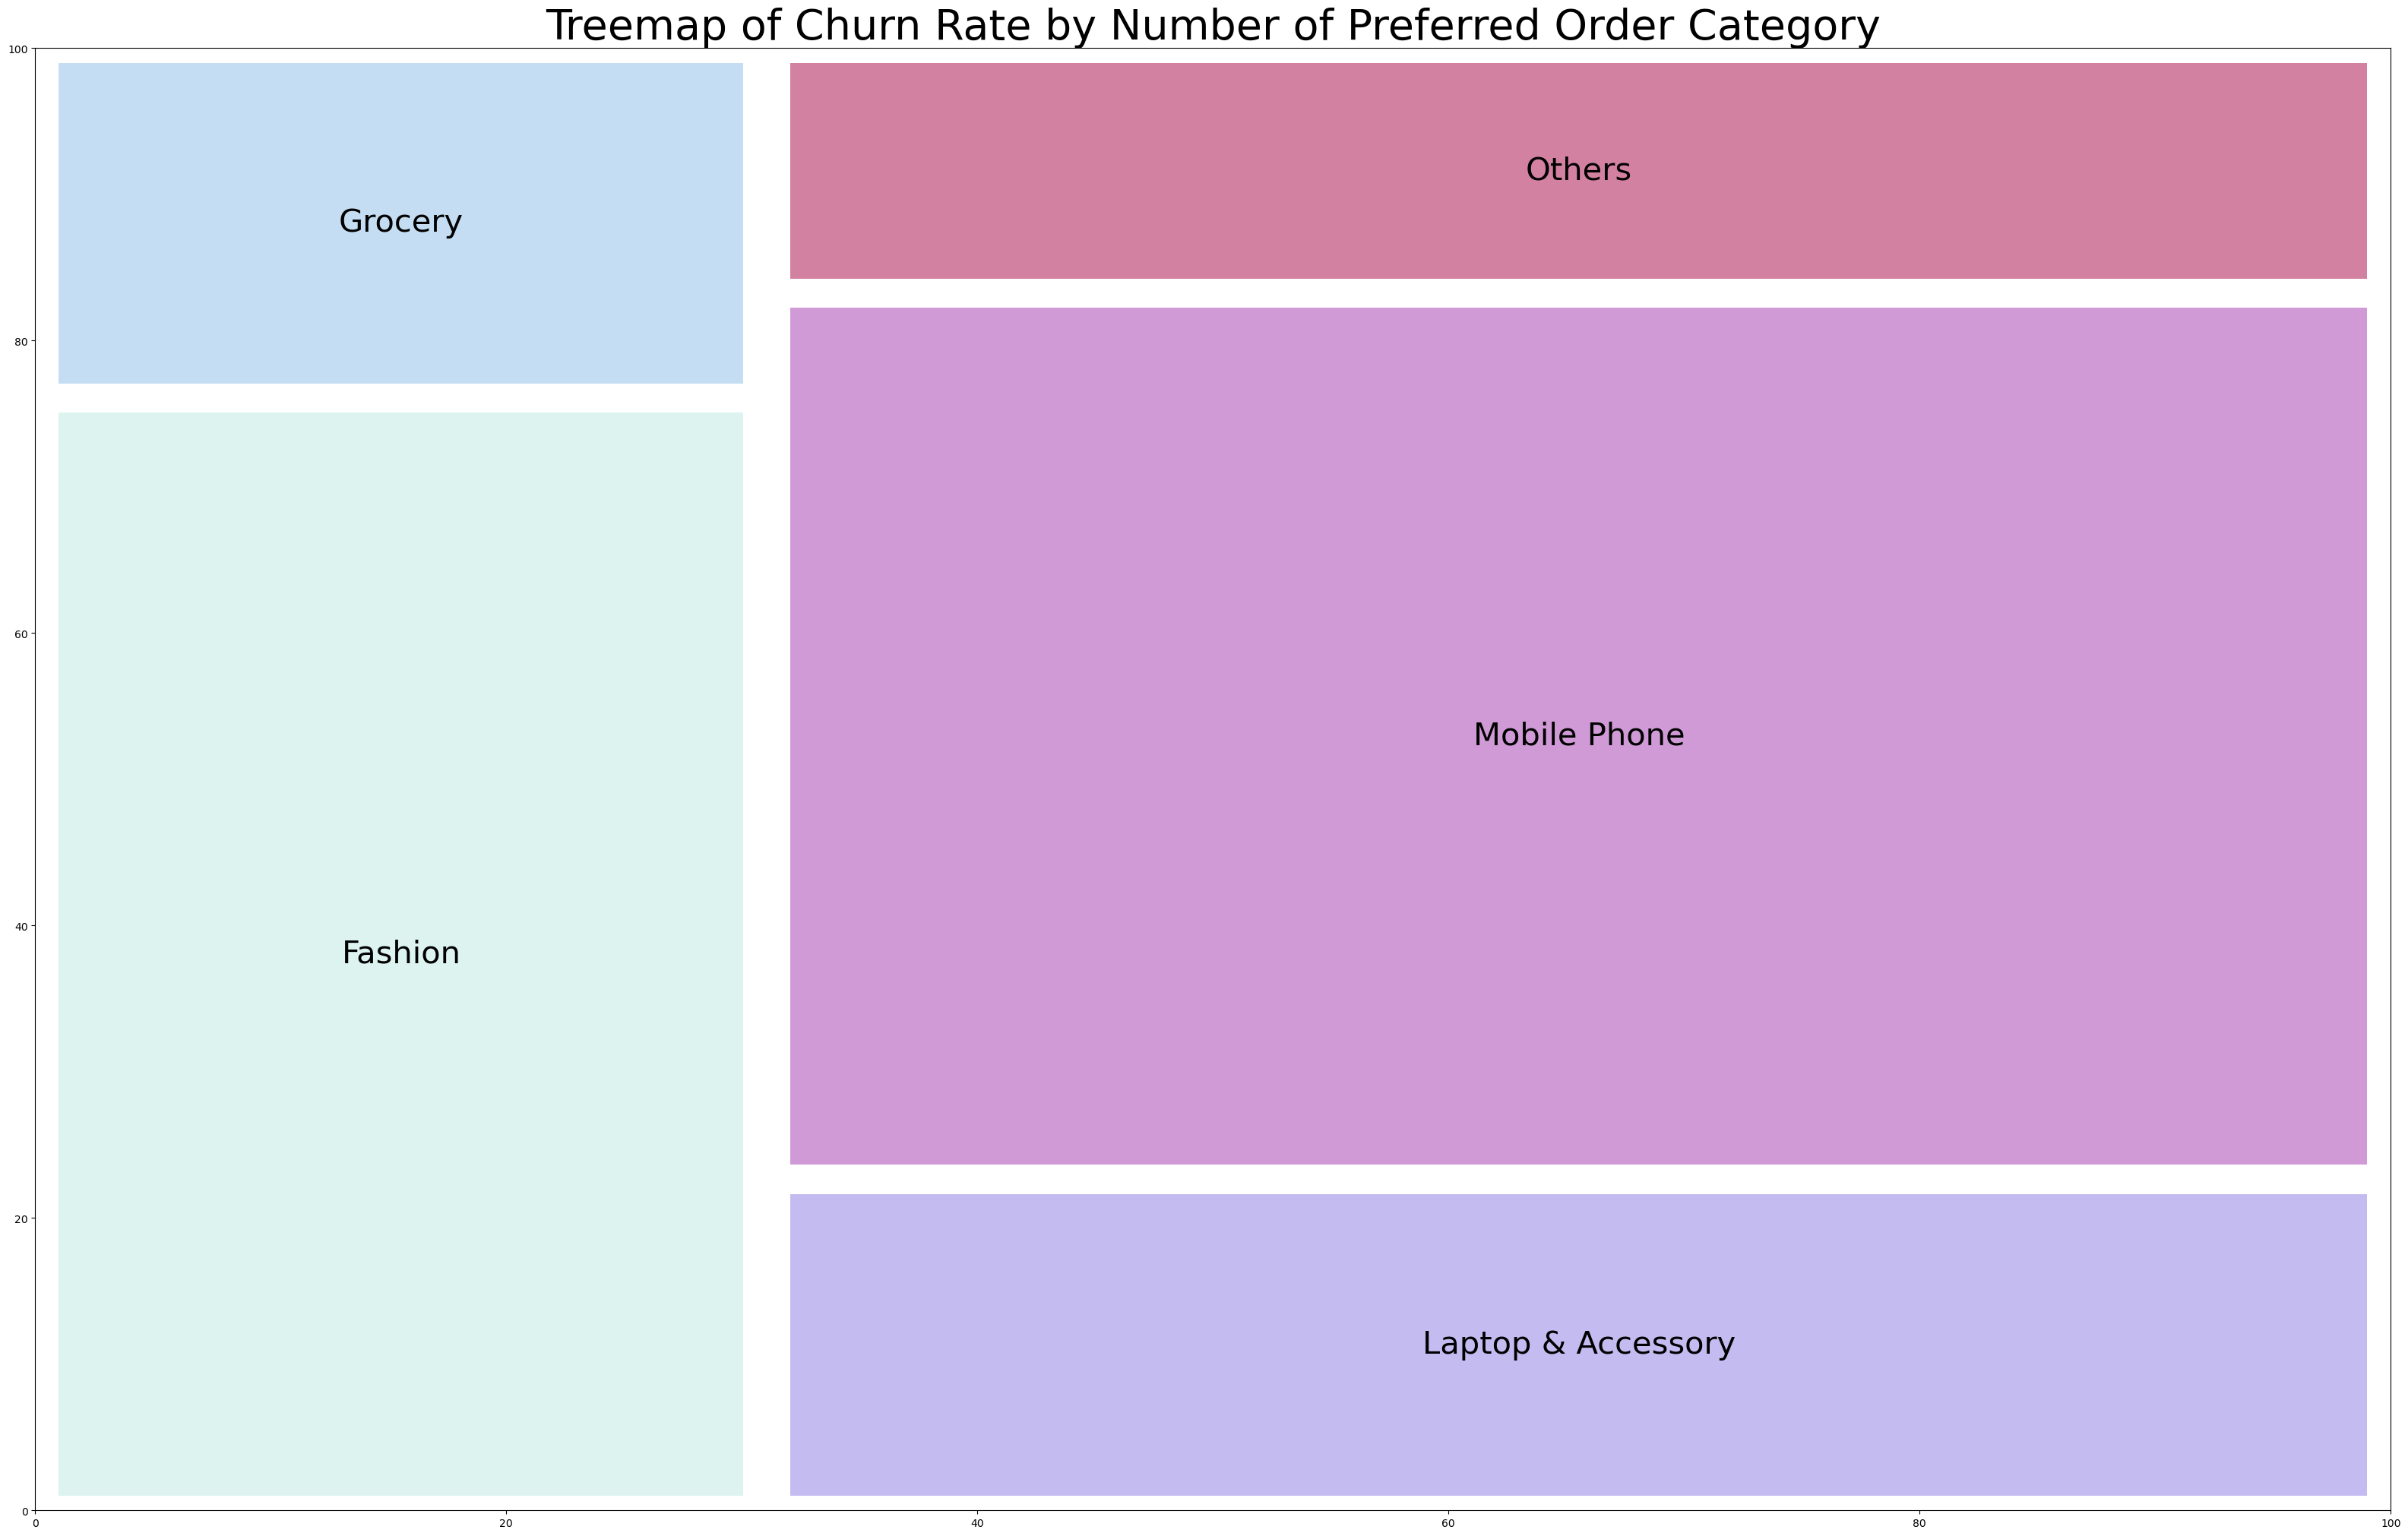

In [115]:

axis = squarify.plot(sizes=POC_mean["Churn"],
                     label=POC_mean["PreferedOrderCat"],
                     color=sns.color_palette('cubehelix_r', 12), 
                     alpha=1,
                     pad=1,
                     text_kwargs={'fontsize': 30})
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of Churn Rate by Number of Preferred Order Category", fontsize=40)
plt.show();

## Order Amount Hike From last Year



In [116]:
new_df['OrderAmountHikeFromlastYear'].skew()

0.818647537667008

In [117]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['OrderAmountHikeFromlastYear']
non_churned_column = new_df[new_df['Churn'] == 0]['OrderAmountHikeFromlastYear']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 2167255.5
P-value: 0.25190814637359515


## Coupon Used

In [118]:
new_df['CouponUsed'].skew()

2.517697106341016

In [119]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['CouponUsed']
non_churned_column = new_df[new_df['Churn'] == 0]['CouponUsed']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 2175294.5
P-value: 0.3148664248990034


## Order Count¶

In [120]:
new_df['OrderCount'].skew()

2.1868046498675504

In [121]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['OrderCount']
non_churned_column = new_df[new_df['Churn'] == 0]['OrderCount']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 2133363.0
P-value: 0.0486066535846973


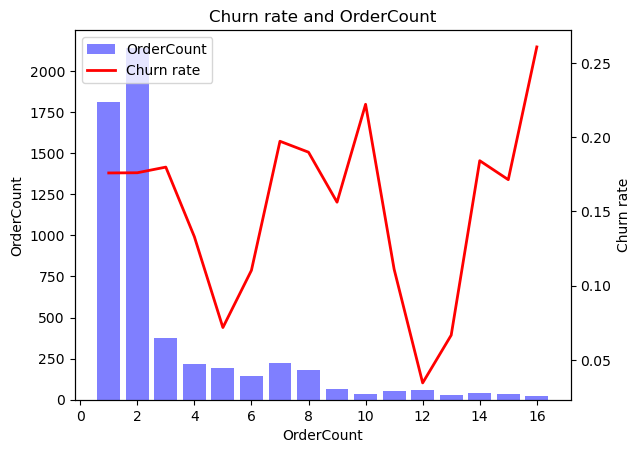

In [122]:
# Calculate churn rate for each tenure
churn_rate = new_df.groupby('OrderCount')['Churn'].mean()

# Calculate the frequency of each tenure
OrderCount_freq = new_df['OrderCount'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(OrderCount_freq.index, OrderCount_freq.values, color='blue', alpha=0.5, label='OrderCount')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('OrderCount')
ax1.set_ylabel('OrderCount')
ax2.set_ylabel('Churn rate')
plt.title('Churn rate and OrderCount')

# Add the legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Display the chart
plt.show()

OrderCount_bins
(0.0, 4.0]      0.174286
(4.0, 8.0]      0.145553
(8.0, 12.0]     0.122642
(12.0, 16.0]    0.166667
Name: Churn, dtype: float64


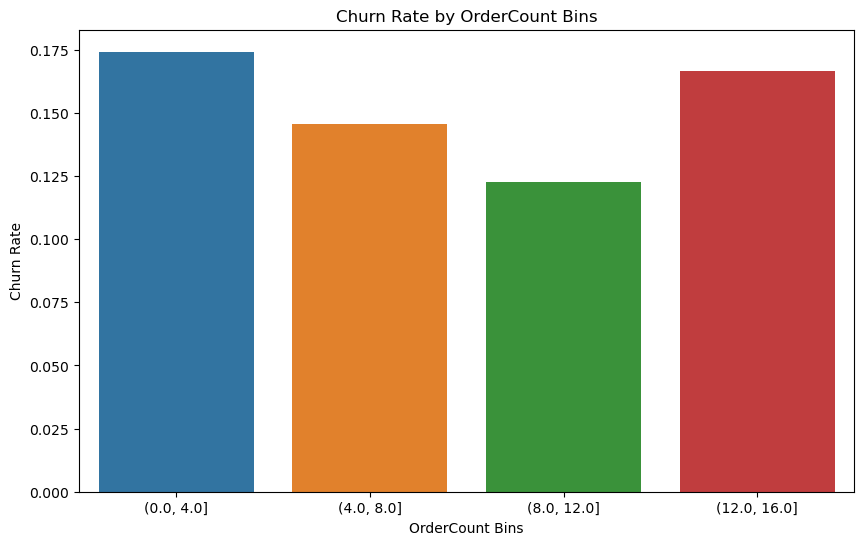

In [123]:
# Create bins for Tenure
bins = np.arange(0, new_df['OrderCount'].max() + 1, 4)
new_df['OrderCount_bins'] = pd.cut(new_df['OrderCount'], bins)

# Calculate churn rate for each bin
churn_rate_by_bin = new_df.groupby('OrderCount_bins')['Churn'].mean()
print(churn_rate_by_bin)

# Visualize churn rate by Tenure bin
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_bin.index, y=churn_rate_by_bin.values)
plt.ylabel('Churn Rate')
plt.xlabel('OrderCount Bins')
plt.title('Churn Rate by OrderCount Bins')
plt.show()

## Day Since Last Order

In [124]:
new_df['DaySinceLastOrder'].skew()

1.188192461586426

In [125]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['DaySinceLastOrder']
non_churned_column = new_df[new_df['Churn'] == 0]['DaySinceLastOrder']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 1621380.0
P-value: 1.0392135211226783e-39


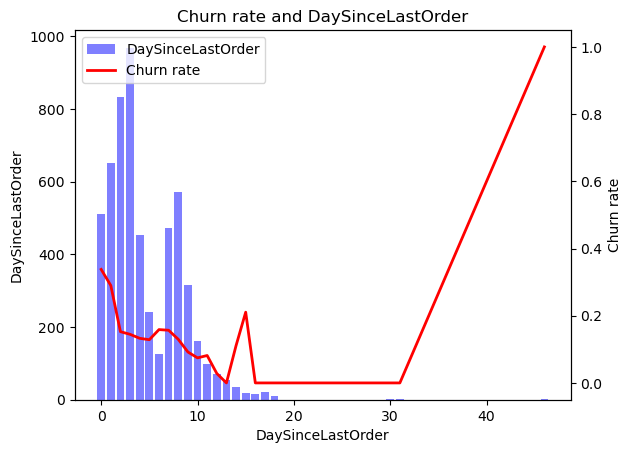

In [126]:
# Calculate churn rate for each tenure
churn_rate = new_df.groupby('DaySinceLastOrder')['Churn'].mean()

# Calculate the frequency of each tenure
DaySinceLastOrder_freq = new_df['DaySinceLastOrder'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(DaySinceLastOrder_freq.index, DaySinceLastOrder_freq.values, color='blue', alpha=0.5, label='DaySinceLastOrder')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('DaySinceLastOrder')
ax1.set_ylabel('DaySinceLastOrder')
ax2.set_ylabel('Churn rate')
plt.title('Churn rate and DaySinceLastOrder')

# Add the legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Display the chart
plt.show()

## Cashback Amount

In [127]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['CashbackAmount']
non_churned_column = new_df[new_df['Churn'] == 0]['CashbackAmount']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 1628505.0
P-value: 2.518463732518876e-38


CashbackGroup
High    0.112256
Low     0.224512
Name: Churn, dtype: float64


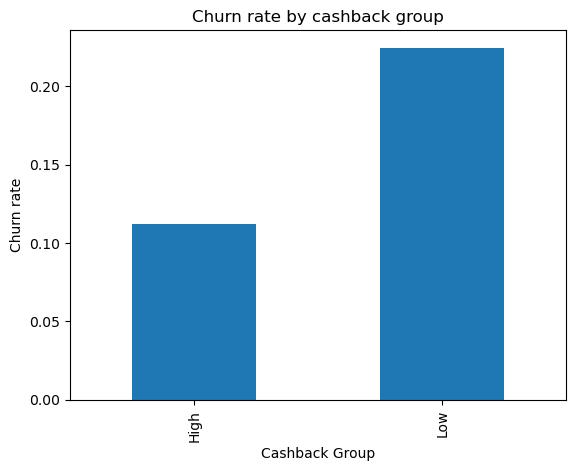

In [128]:
cashback_median = new_df['CashbackAmount'].median()
new_df['CashbackGroup'] = np.where(new_df['CashbackAmount'] <= cashback_median, 'Low', 'High')
churn_rate_by_cashback = new_df.groupby('CashbackGroup')['Churn'].mean()
print(churn_rate_by_cashback)

churn_rate_by_cashback.plot(kind='bar')
plt.xlabel('Cashback Group')
plt.ylabel('Churn rate')
plt.title('Churn rate by cashback group')
plt.show()

## Tenure

In [129]:
new_df["Tenure"].skew()

0.5980321092766222

In [130]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['Tenure']
non_churned_column = new_df[new_df['Churn'] == 0]['Tenure']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 925678.0
P-value: 1.4209773223856094e-177


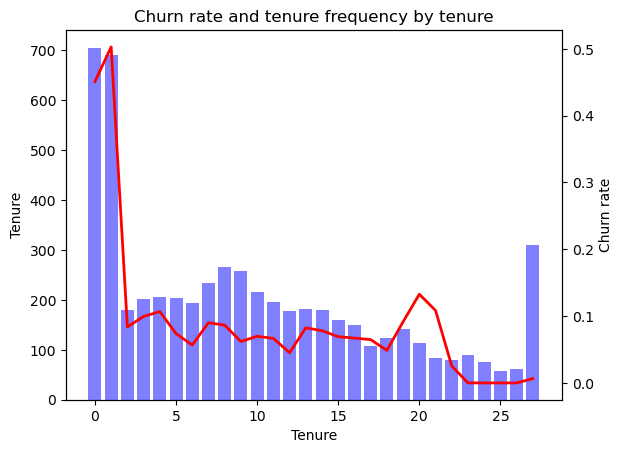

In [131]:
# Calculate churn rate for each tenure
churn_rate = new_df.groupby('Tenure')['Churn'].mean()

# Calculate the frequency of each tenure
tenure_freq = new_df['Tenure'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(tenure_freq.index, tenure_freq.values, color='blue', alpha=0.5, label='Tenure')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate.index, churn_rate.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('Tenure')
ax1.set_ylabel('Tenure')
ax2.set_ylabel('Churn rate')
plt.title('Churn rate and tenure frequency by tenure')

# Display the chart
plt.show()

Tenure_bins
(0.0, 5.0]      0.283300
(5.0, 10.0]     0.073756
(10.0, 15.0]    0.068386
(15.0, 20.0]    0.080315
(20.0, 25.0]    0.028721
Name: Churn, dtype: float64


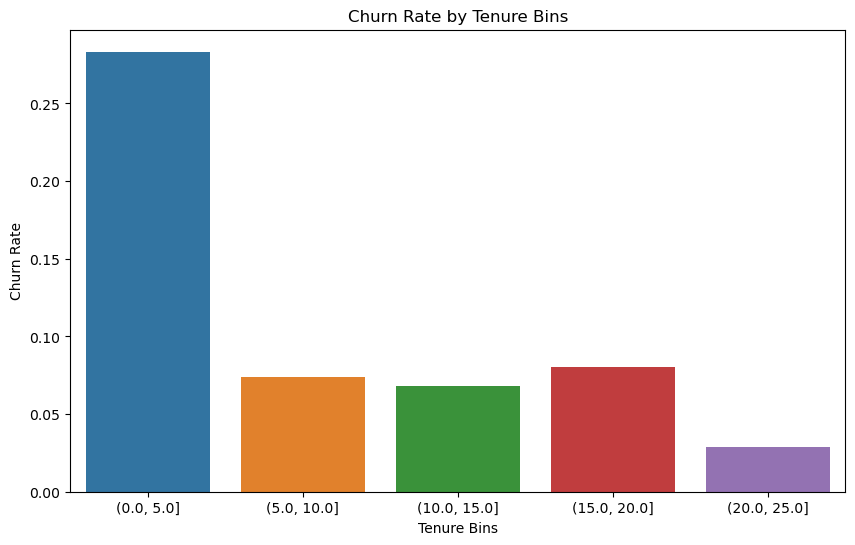

In [132]:
#draft = new_df.copy()
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for Tenure
bins = np.arange(0, new_df['Tenure'].max() + 1, 5)
new_df['Tenure_bins'] = pd.cut(new_df['Tenure'], bins)

# Calculate churn rate for each bin
churn_rate_by_bin = new_df.groupby('Tenure_bins')['Churn'].mean()
print(churn_rate_by_bin)

# Visualize churn rate by Tenure bin
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_bin.index, y=churn_rate_by_bin.values)
plt.ylabel('Churn Rate')
plt.xlabel('Tenure Bins')
plt.title('Churn Rate by Tenure Bins')
plt.show()


## Warehouse To Home

In [133]:
new_df["WarehouseToHome"].skew()

1.6377827410954877

In [134]:
# Generate two groups of non-normally distributed data
churned_column = new_df[new_df['Churn'] == 1]['WarehouseToHome']
non_churned_column = new_df[new_df['Churn'] == 0]['WarehouseToHome']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_column, non_churned_column)

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 2439128.0
P-value: 1.3934174342143595e-06


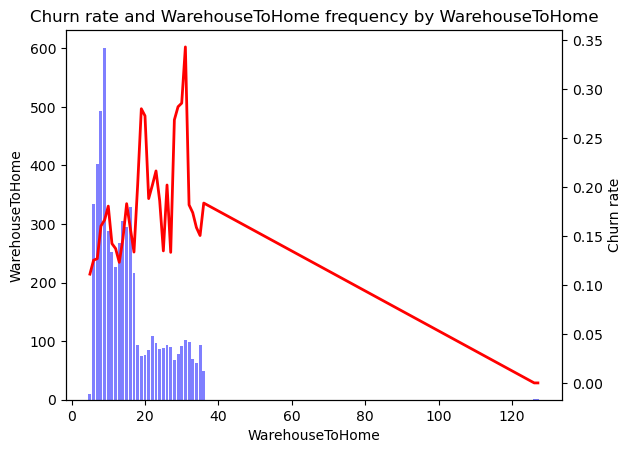

In [135]:
churn_rate_by_WarehouseToHome = new_df.groupby('WarehouseToHome').agg({"Churn":np.mean}).sort_index()

# Calculate the frequency of each tenure
WarehouseToHome_freq = new_df['WarehouseToHome'].value_counts().sort_index()

# Create the plot
fig, ax1 = plt.subplots()

# Add the bar chart of tenure frequency
ax1.bar(WarehouseToHome_freq.index, WarehouseToHome_freq.values, color='blue', alpha=0.5, label='WarehouseToHome')

# Add the line chart of churn rate
ax2 = ax1.twinx()
ax2.plot(churn_rate_by_WarehouseToHome.index, churn_rate_by_WarehouseToHome.values, color='red', linewidth=2, label='Churn rate')

# Set the labels and titles
ax1.set_xlabel('WarehouseToHome')
ax1.set_ylabel('WarehouseToHome')
ax2.set_ylabel('Churn rate')
plt.title('Churn rate and WarehouseToHome frequency by WarehouseToHome')


# Display the chart
plt.show()



WarehouseToHomeGroup
High    0.189837
Low     0.147826
Name: Churn, dtype: float64


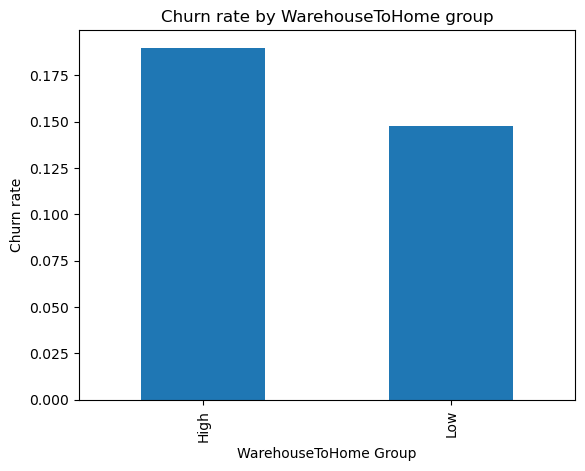

In [136]:
WarehouseToHome_median = new_df['WarehouseToHome'].median()
new_df['WarehouseToHomeGroup'] = np.where(new_df['WarehouseToHome'] <= WarehouseToHome_median, 'Low', 'High')
churn_rate_by_cashback = new_df.groupby('WarehouseToHomeGroup')['Churn'].mean()
print(churn_rate_by_cashback)

churn_rate_by_cashback.plot(kind='bar')
plt.xlabel('WarehouseToHome Group')
plt.ylabel('Churn rate')
plt.title('Churn rate by WarehouseToHome group')
plt.show()

#### Analyze customer experience : 

#### Satisfaction Score 

In [137]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(new_df['SatisfactionScore'], new_df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn                 0    1
SatisfactionScore           
1                  1010  130
2                   503   73
3                  1460  305
4                   879  181
5                   830  259


Chi-square statistic: 68.97984636982241
Degrees of freedom: 4
p-value: 3.7266768784466044e-14


In [138]:
SS_mean = round(new_df.groupby("SatisfactionScore")["Churn"].mean()*100,2).reset_index()
SS_mean

,SatisfactionScore,Churn
0,1,11.40
1,2,12.67
2,3,17.28
3,4,17.08
4,5,23.78


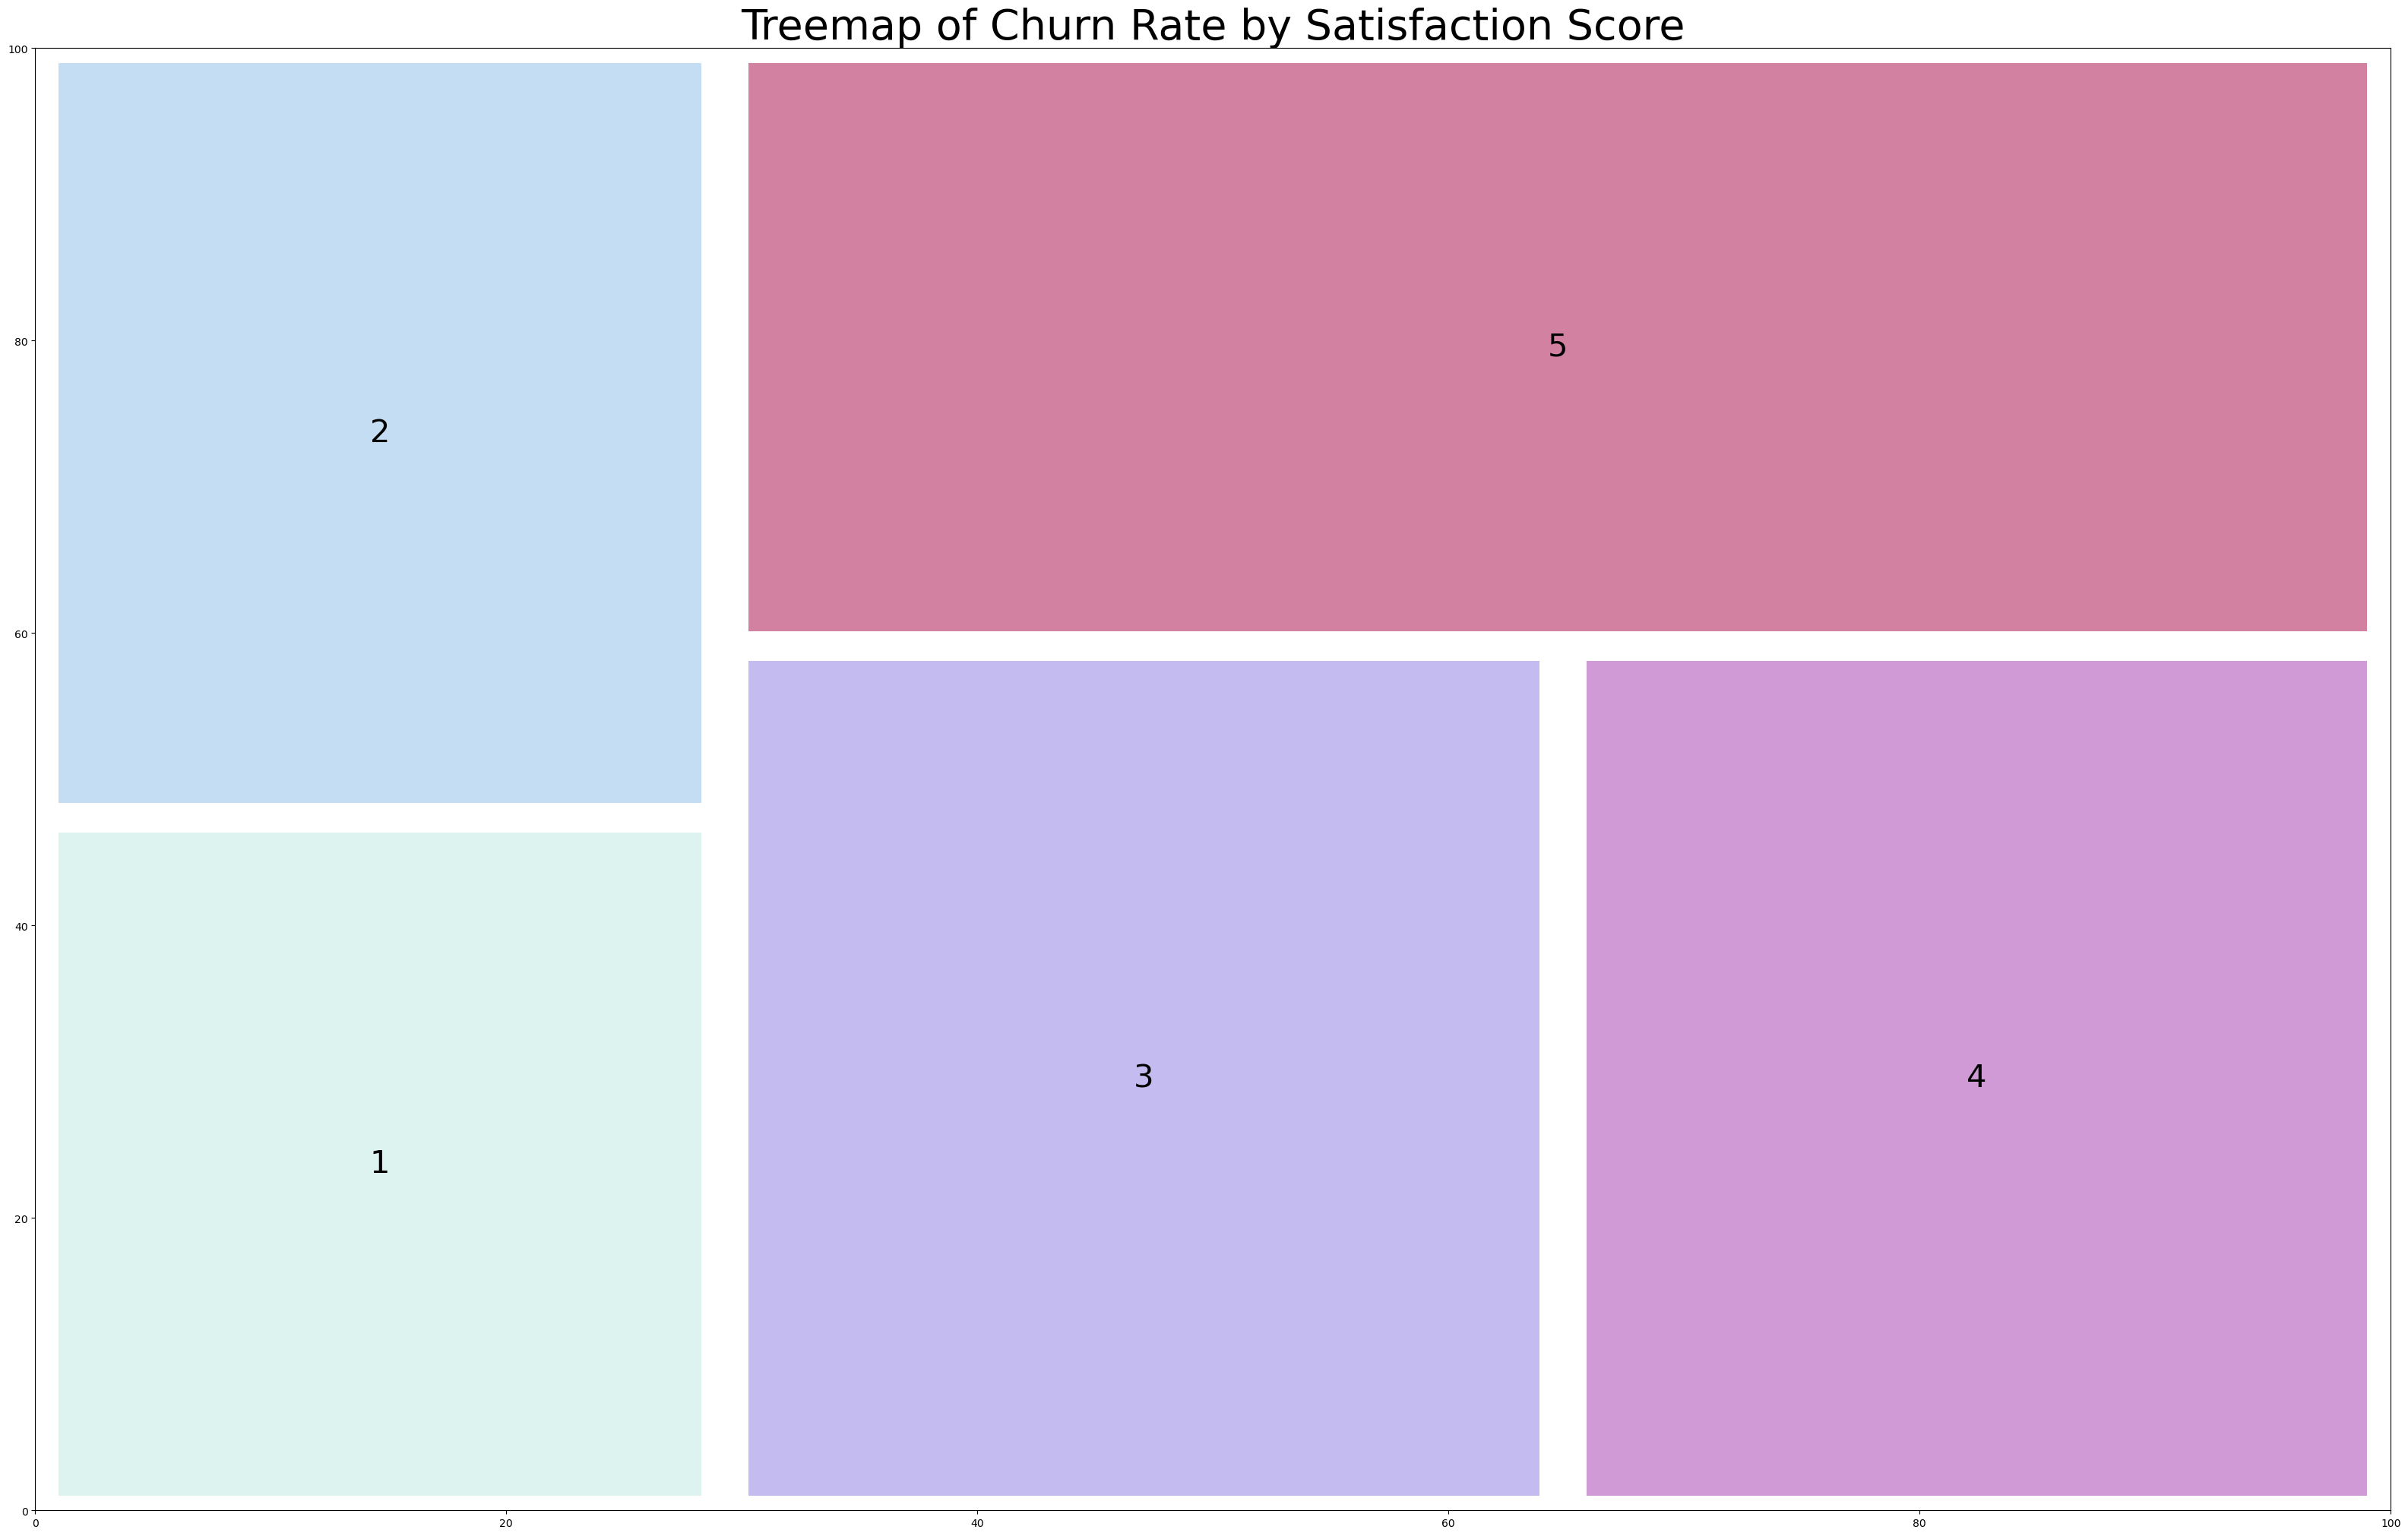

In [139]:
axis = squarify.plot(sizes=SS_mean["Churn"],
                     label=SS_mean["SatisfactionScore"],
                     color=sns.color_palette('cubehelix_r', 12), 
                     alpha=1,
                     pad=1,
                     text_kwargs={'fontsize': 30})
ax.set_xticks([])
ax.set_yticks([])
fig=plt.gcf()
fig.set_size_inches(40,25)
plt.title("Treemap of Churn Rate by Satisfaction Score", fontsize=40)
plt.show();

#### complain

In [140]:
# Create a contingency table of CityTier and Churn
contingency_table = pd.crosstab(df['Complain'], df['Churn'])

# Print the contingency table
print(contingency_table)
print("\n")
# Conduct a chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p_value)

Churn        0    1
Complain           
0         3586  440
1         1096  508


Chi-square statistic: 350.92545525927073
Degrees of freedom: 1
p-value: 2.6644609654641377e-78


In [141]:
C_mean = round(new_df.groupby("Complain")["Churn"].mean()*100,2).reset_index()
C_mean

,Complain,Churn
0,0,10.93
1,1,31.67


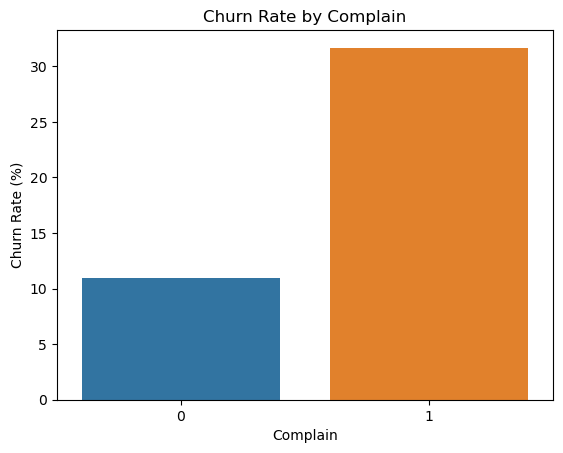

In [142]:
sns.barplot(x="Complain", y="Churn", data=C_mean)

# set the axis labels and title
plt.xlabel("Complain")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Complain")

# show the plot
plt.show()

## Correlation matrix

In [143]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   CustomerID                   5630 non-null   int64   
 1   Churn                        5630 non-null   int64   
 2   PreferredLoginDevice         5630 non-null   object  
 3   CityTier                     5630 non-null   int64   
 4   PreferredPaymentMode         5630 non-null   object  
 5   Gender                       5630 non-null   object  
 6   PreferedOrderCat             5630 non-null   object  
 7   SatisfactionScore            5630 non-null   int64   
 8   MaritalStatus                5630 non-null   object  
 9   NumberOfAddress              5630 non-null   int64   
 10  Complain                     5630 non-null   int64   
 11  CashbackAmount               5630 non-null   float64 
 12  DaySinceLastOrder            5630 non-null   float64 
 13  Ord

In [144]:
new_df.drop(new_df.columns[19:27],axis=1,inplace=True)

In [145]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   PreferredPaymentMode         5630 non-null   object 
 5   Gender                       5630 non-null   object 
 6   PreferedOrderCat             5630 non-null   object 
 7   SatisfactionScore            5630 non-null   int64  
 8   MaritalStatus                5630 non-null   object 
 9   NumberOfAddress              5630 non-null   int64  
 10  Complain                     5630 non-null   int64  
 11  CashbackAmount               5630 non-null   float64
 12  DaySinceLastOrder            5630 non-null   float64
 13  OrderCount        

# Encoding

In [146]:
cat_data = new_df.select_dtypes(include='object')

#encode categorical variables and add it to the normal dataset
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([new_df.drop(cat_data.columns, axis=1), encoded], axis=1)

## Feature selection

In [147]:
data_enc.drop(columns=["CustomerID"],axis=1,inplace=True)

In [148]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   CityTier                             5630 non-null   int64  
 2   SatisfactionScore                    5630 non-null   int64  
 3   NumberOfAddress                      5630 non-null   int64  
 4   Complain                             5630 non-null   int64  
 5   CashbackAmount                       5630 non-null   float64
 6   DaySinceLastOrder                    5630 non-null   float64
 7   OrderCount                           5630 non-null   float64
 8   CouponUsed                           5630 non-null   float64
 9   OrderAmountHikeFromlastYear          5630 non-null   float64
 10  HourSpendOnApp                       5630 non-null   float64
 11  Tenure                        

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

x = data_enc.drop(['Churn'], axis = 1)
y = data_enc['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify= y )

from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [150]:
sel.get_support()

array([False,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [151]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

8

In [152]:
selected_feat

Index(['SatisfactionScore', 'NumberOfAddress', 'Complain', 'CashbackAmount',
       'DaySinceLastOrder', 'OrderAmountHikeFromlastYear', 'Tenure',
       'WarehouseToHome'],
      dtype='object')

# Q3 Conclusion:
Churn Indecators:
* City Tier: Where **City Tier 2 & 3** has the most churn rate **~20%**.
* Marital Status: Where **Single customers** are the most churned customers with **~27%** Churn rate.
* Gander: **Males** are most likely to churn than Females, where  males has **~18%** Churn rate.
* Preferred Login Device: **Computer Users** are more likely to churn than mobile useres, where computer users have **~20%** Churn rate.
* Preferred Payment Mode: **Cash on Dileviry and E wallet** users are more likely to churn, with curn rate **25%, 22%** respectively.
* NumberOfDeviceRegistered: Churn rate increases as number of devices increases, where customers with **6 devices registeres have 33%** Chrun rate.
* NumberOfAddress: Churn **rate increses by number of adress increases**, although we cannot conclude that high adresses cause churn because number of customers with high adresses are very little.
* PreferredOrderCategory: **Mobile category** is the most prefered category with churn rate **27%**.
* OrderCount: Order count is an indicator of churn although there's no obvious pattern to indicate how it affect the chrun rate.
* DaySinceLastOrder: DaySinceLastOrder is an indicator of churn, there's no obvious pattern but we can say **churn rate increase after 15 Days**.
* CashbackAmount: Customers with **low cashback amount** from last month tends to churn more than customers with high cashback amount.
* Tenure: Customers with **low ternure (0 to 5)** in the organization have the highest churn rate.
* WarehouseToHome: Customers with **far WarehouseToHome** are more likely to churn thatn customers with near WarehouseToHome.
* SatisfactionScore: Custoemrs with **5 satisfaction score** have the highest churn rate **~23%**.
* Complain: Customers that **raised complains** in the past month have higher churn rate **(~32%)** compared to who didn't.

According to feature selection randm forest the most variables that affect churn are:
NumberfAddress
-Complain
-CashbackAmount
-DaySinceLastOrder
-Tenure
-WarehouseToHome

# Question 4:
**Analyze the distance between the warehouse and the customer's home and check if it’s relate to complains?**

### **Mann-Whitney U test**

In [153]:
new_df['WarehouseToHome'].skew()

1.6377827410954877

In [154]:
from scipy.stats import ttest_ind
import scipy.stats as stats


complainers = new_df[new_df['Complain'] == 1]
non_complainers = new_df[new_df['Complain'] == 0]

avg_distance_complaints = complainers['WarehouseToHome'].mean()
avg_distance_no_complaints = non_complainers['WarehouseToHome'].mean()

print("Average distance for customers who made a complaint:", avg_distance_complaints)
print("Average distance for customers who did not make a complaint:", avg_distance_no_complaints)

# Separate the data into two groups based on 'Complain' column
complainers_column = new_df[new_df['Complain'] == 1]['WarehouseToHome']
non_complainers_column = new_df[new_df['Complain'] == 0]['WarehouseToHome']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(complainers_column, non_complainers_column)
#f_statistic, p_value = stats.f_oneway(complainers_column, non_complainers_column)

print("F-statistic: ", statistic)
print("P-value: ", p_value)

Average distance for customers who made a complaint: 15.709476309226932
Average distance for customers who did not make a complaint: 15.313959264778937
F-statistic:  3341818.0
P-value:  0.039809647504852365


### Based on the **Mann-Whitney U** test,we conclude that **there is  significant difference** in the mean WarehouseToHome distance between customers who complain and those who do not complain.

In [155]:
grouped_data = new_df.groupby('Complain')['WarehouseToHome']
grouped_data.agg(['mean', 'median', 'std'])

,mean,median,std
Complain,,,
0,15.313959,13.0,8.576889
1,15.709476,13.0,8.188310


## Correlation Analysis

In [156]:
# point-biserial correlation coefficient, which measures the relationship between a binary variable and a continuous variable
from scipy.stats import pointbiserialr

correlation, _ = pointbiserialr(new_df['Complain'], new_df['WarehouseToHome'])
print('Correlation coefficient:', correlation)

Correlation coefficient: 0.021081146885559874


# Q4 Conclusion

* WarehouseToHome is related to the complains but the corelation between them is positive (where farWarehouseToHome is more assosiated with complains) but it's weak and not noticable.


# Question 5:
**Does the number of addresses added by customers impact the churn rate?**

# Q5 Conclusion

As shown in Q3:

NumberOfAddress Churn **rate increses as number of adress increases**, although we cannot conclude that high adresses cause churn because number of customers with high adresses are very few.


# Models

In [157]:
## ML
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer 
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [172]:
#selecting features and target variable, and splitting the data
X=data_enc.drop(['Churn'],axis=1)
y=data_enc['Churn']

# Split the dataset into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3 ,stratify = y ,random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Decision Tree

In [173]:
Decision_Tree_model = DecisionTreeClassifier(max_depth = 4 , random_state=42) 
Decision_Tree_model.fit(X_train , y_train)

# Evaluate the model on the validation set
y_pred_val = Decision_Tree_model.predict(X_val)
print('F1 Score:', round(f1_score(y_val, y_pred_val),2))

F1 Score: 0.61


## Random Forest

In [174]:
# creating a RF classifier
Random_Forest_model = RandomForestClassifier(max_depth =4, random_state=42)  
Random_Forest_model.fit(X_train, y_train)
  
# Evaluate the model on the validation set
y_pred_val = Random_Forest_model.predict(X_val)
print('F1 Score:', round(f1_score(y_val, y_pred_val),2))  


F1 Score: 0.28


## AdaBoostClassifier

In [175]:
AdaBoost_model = AdaBoostClassifier(n_estimators=200, random_state=42)
AdaBoost_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred_val = AdaBoost_model.predict(X_val)
print('F1 Score:', round(f1_score(y_val, y_pred_val),2)) 

F1 Score: 0.67


# Modifying Models

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 20, num =16)]

# Minimum number of samples required to split a node
min_samples_split = randint(2, 20)

# Minimum number of samples required at each leaf node
min_samples_leaf = randint(1, 20)

# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ["gini", "entropy"]


## Decision Tree

In [177]:
# Define the parameter space for the randomized search
param_dist = {
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "criterion": criterion,
    "max_features" :max_features
}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(max_depth = 4,random_state=42)

# Perform the randomized search with 5-fold cross-validation
#search across 100 different combinations, and use all available cores

n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, random_state=42, scoring='f1_macro')
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1 score on the test set
print(f"Best hyperparameters: {random_search.best_params_}")
y_pred = random_search.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')
print(f"F1 score on validation set: {f1:.2f}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 9}
F1 score on validation set: 0.81


## Random Forest 

In [178]:
param_dist = {
    "n_estimators":n_estimators ,
    "max_depth": max_depth,
    'min_samples_split': min_samples_split,
    "min_samples_leaf":min_samples_leaf ,
    "criterion": criterion,
    'max_features': max_features,
    'bootstrap': bootstrap
}

# Create a Random Forest classifier
clf = RandomForestClassifier(max_depth = 4,random_state=42)

# Perform the randomized search with 5-fold cross-validation
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, random_state=42, scoring='f1_macro')
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1 score on the test set
print(f"Best hyperparameters: {random_search.best_params_}")
y_pred = random_search.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')
print(f"F1 score on validation set: {f1:.2f}")

Best hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 1600}
F1 score on validation set: 0.85


## AdaBoost Classifier

In [179]:
# Define the parameter space for the randomized search
param_dist = {
    "base_estimator__max_depth": [1, 2, 3, 4],
    "n_estimators": randint(50, 200),
    "learning_rate": [0.1, 0.5, 1.0, 2.0]
}

# Create an AdaBoost classifier with decision stumps as the weak learners
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

# Perform the randomized search with 5-fold cross-validation
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, random_state=42, scoring='f1_macro')
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding F1 score on the test set
print(f"Best hyperparameters: {random_search.best_params_}")
y_pred = random_search.predict(X_val)
f1 = f1_score(y_val, y_pred, average='macro')
print(f"F1 score on validation set: {f1:.2f}")

Best hyperparameters: {'base_estimator__max_depth': 3, 'learning_rate': 1.0, 'n_estimators': 121}
F1 score on validation set: 0.89


## Predection on test set

In [180]:
y_pred_test = random_search.predict(X_test)
print('F1 Score:', round(f1_score(y_test, y_pred_test),2))

F1 Score: 0.83


# General Insights & KPIS for the business

**NPS**

In [181]:
promoters = len(new_df[new_df['SatisfactionScore'] >= 4])
detractors = len(new_df[new_df['SatisfactionScore'] <= 2])
neutrals = len(new_df[(new_df['SatisfactionScore'] == 3)])

# Calculate the total number of responses
total_responses = len(new_df)

# Calculate the NPS score
nps_score = 100 * (promoters - detractors) / total_responses

# Print the results
print('Promoters: ', promoters)
print('Detractors: ', detractors)
print('Neutrals: ', neutrals)
print('Total Responses: ', total_responses)
print('NPS Score: ', nps_score)

Promoters:  2149
Detractors:  1716
Neutrals:  1765
Total Responses:  5630
NPS Score:  7.690941385435169


Nps score is so low as according to industry benchmarks, a good NPS score for an ecommerce business is typically around 50 or higher. Scores above 70 are considered excellent, while scores below 30 are considered poor.

**Active user rate**

In [182]:
active_users = (new_df['HourSpendOnApp'] >= 3).sum()
active_user_rate = (active_users / len(new_df['HourSpendOnApp']) * 100)
print(active_user_rate)

71.56305506216695


**Customer Complaint Rate**

In [183]:
num_complained = (new_df['Complain']==1).sum()

num_customers = len(df.index)

complaint_rate = (num_complained / num_customers) * 100

print(complaint_rate)

28.49023090586146


Business should work on lowering the complaint rate